<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html day4.do.txt --no_abort -->
<!-- dom:TITLE: Variational Quantum Eigensolver and the Lipkin model -->

# Variational Quantum Eigensolver and the Lipkin model
**Nuclear TALENT course on quantum computing**

Date: **May 22, 2024**

## Variational Quantum Eigensolver

One initial algorithm to estimate the eigenenergies of a quantum
Hamiltonian was [quantum phase estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html). In it, one
encodes the eigenenergies, one binary bit at a time (up to $n$ bits),
into the complex phases of the quantum states of the Hilbert space for
$n$ qubits. It does this by applying powers of controlled unitary
evolution operators to a quantum state that can be expanded in terms
of the Hamiltonian's eigenvectors of interest. The eigenenergies are
encoded into the complex phases in such a way that taking the inverse
quantum Fourier transformation (see Hundt sections 6.1-6.2) of the states into which the
eigen-energies are encoded results in a measurement probability
distribution that has peaks around the bit strings that represent a
binary fraction which corresponds to the eigen-energies of the quantum
state acted upon by the controlled unitary operators.

## The VQE

While quantum
phase estimation (QPE) is provably efficient, non-hybrid, and
non-variational, the number of qubits and length of circuits required
is too great for our NISQ era quantum computers. Thus, QPE is only
efficiently applicable to large, fault-tolerant quantum computers that
likely won't exist in the near, but the far future.

Therefore, a different algorithm for finding the eigen-energies of a
quantum Hamiltonian was put forth in 2014 called the variational
quantum eigensolver, commonly referred to as [VQE](https://arxiv.org/abs/2111.05176). The
algorithm is hybrid, meaning that it requires the use of both a
quantum computer and a classical computer. It is also variational,
meaning that it relies, ultimately, on solving an optimization problem
by varying parameters and thus is not as deterministic as QPE. The
variational quantum eigensolver is based on the variational principle:

## Expectation value of Hamiltonian

The expectation value of a Hamiltonian $H$ in a state
$|\psi(\theta)\rangle$ parameterized by a set of angles $\theta$, is
always greater than or equal to the minimum eigen-energy $E_0$. To see
this, let $|n\rangle$ be the eigenstates of $H$, that is

$$
H|n\rangle=E_n|n\rangle.
$$

## Expanding in the eigenstates

We can then expand our state $|\psi(\theta)\rangle$ in terms of said eigenstates

$$
|\psi(\theta)\rangle=\sum_nc_n|n\rangle,
$$

and plug this into the expectation value to yield

$$
\langle\psi(\theta)|H|\psi(\theta)\rangle=\sum_{nm}c^*_mc_n\langle m|H|n \rangle
=\sum_{nm}c^*_mc_nE_n\langle m|n \rangle=\sum_{nm}\delta_{nm}c^*_mc_nE_n=\sum_{n}|c_n|^2E_n \geq E_0\sum_{n}|c_n|^2=E_0,
$$

which implies that we can minimize over the set of angles $\theta$ and arrive at the ground state energy $E_0$

$$
\min_\theta \ \langle\psi(\theta)|H|\psi(\theta)\rangle=E_0.
$$

## Basic steps of the VQE algorithm

Using this fact, the VQE algorithm can be broken down into the following steps
1. Prepare the variational state $|\psi(\theta)\rangle$ on a quantum computer.

2. Measure this circuit in various bases and send these measurements to a classical computer

3. The classical computer post-processes the measurement data to compute the expectation value $\langle\psi(\theta)|H|\psi(\theta)\rangle$

4. The classical computer varies the parameters $\theta$ according to a classical minimization algorithm and sends them back to the quantum computer which runs step 1 again.

This loop continues until the classical optimization algorithm
terminates which results in a set of angles $\theta_{\text{min}}$ that
characterize the ground state $|\phi(\theta_{\text{min}})\rangle$ and
an estimate for the ground state energy
$\langle\psi(\theta_{\text{min}})|H|\psi(\theta_{\text{min}})\rangle$.

## Expectation values

To execute the second step of VQE, we need to understand how
expectation values of operators can be estimated via quantum computers
by post-processing measurements of quantum circuits in different
basis sets. To rotate bases, one uses the basis rotator $R_\sigma$ which is
defined for each Pauli gate $\sigma$ to be

<!-- Equation labels as ordinary links -->
<div id="eq:auto8"></div>

$$
\begin{equation}
R_{\sigma} = H,  \text{if} \ \sigma = X,
\end{equation} \label{eq:auto8} \tag{1}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
HS^{\dagger},  \text{if} \ \sigma = Y,
\label{_auto1} \tag{2}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
I,  \text{if} \ \sigma = Z.
\label{_auto2} \tag{3}
\end{equation}
$$

## Measurements of eigenvalues of the Pauli operators
We can show that these rotations allow us to measure the eigenvalues of the Pauli operators. The eigenvectors of the Pauli $X$ gate are

$$
\vert\pm\rangle = \frac{\vert 0\rangle \pm \vert 1\rangle}{\sqrt{2}},
$$

with eigenvalues $\pm 1$.
Acting on the eigenstates with the rotation in eq. ([37](#eq:auto8)) gives

$$
H\vert +\rangle = +1\vert 0\rangle,
$$

and

$$
H\vert -\rangle = -1\vert 1\rangle.
$$

## Single-qubit states

Any single-qubit state can be written as a linear combination of these eigenvectors,

$$
\vert \psi\rangle = \alpha \vert +\rangle + \beta \vert -\rangle.
$$

We then have the following expectation value for the Pauli $X$ operator

$$
\langle \vert X\vert \rangle = \langle \psi\vert X \vert \psi\rangle = |\alpha|^2 - |\beta|^2.
$$

However, we can only measure the qubits in the computational basis. Applying the rotation in eq. ([37](#eq:auto8)) to our state gives

$$
H \vert \psi\rangle = \alpha \vert 0\rangle - \beta \vert 1\rangle.
$$

## Interpretations

This tells us that we are able to estimate $|\alpha|^2$ and
$|\beta|^2$ (and hence the expectation value of the Pauli $X$
operator) by using the rotation in eq. ([37](#eq:auto8)) and measure the
resulting state in the computational basis. We can show this for the
Pauli $Z$ and Pauli $Y$ similarly.

## Reminder on rotations

Note the following identity of the basis rotator

$$
R^\dagger_\sigma Z R_\sigma = \sigma,
$$

which follows from the fact that $HZH=X$ and $SXS^\dagger=Y$.

## Arbitrary Pauli gate

With this, we see that the expectation value of an arbitrary
Pauli-gate $\sigma$ in the state $\vert\psi\rangle$ can be expressed as a linear combination of probabilities

$$
E_{\psi}(\sigma)
= \langle \psi\vert\sigma\vert\psi\rangle \nonumber
$$

$$
=\langle\psi\vert R_{\sigma}^{\dagger}ZR_{\sigma}\vert\psi\rangle =\langle \phi\vert Z\vert \phi\rangle \nonumber
$$

$$
=\langle\phi\vert\left(\sum_{x\in\{0,1\}}(-1)^x\vert x\rangle\langle x\vert\right)\vert\phi\rangle \nonumber
$$

$$
=\sum_{x\in\{0,1\}}(-1)^x\vert\langle x\vert \phi\rangle\vert^2\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} 
=\sum_{x\in\{0,1\}}(-1)^xP(\vert \phi\rangle\to\vert x\rangle),
\label{_auto3} \tag{4}
\end{equation}
$$

where $\vert \phi\rangle=\vert R_\sigma\phi\rangle$ and
$P(\vert \phi\rangle\to\vert x\rangle$ is the probability that the state
$\vert \phi\rangle$ collapses to the state $\vert x\rangle$ when measured.

## Arbitrary string of Pauli operators

This can
be extended to any arbitrary Pauli string: consider the string of
Pauli operators $P=\bigotimes_{p\in Q}\sigma_p$ which acts
non-trivially on the set of qubits $Q$ which is a subset of the total
set of $n$ qubits in the system. Then

$$
E_{\psi}\left(P\right)
=\langle \psi\vert\left(\bigotimes_{p\in Q}\sigma_p\right)\vert \psi\rangle \nonumber
$$

$$
=\langle \psi\vert\left(\bigotimes_{p\in Q}\sigma_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)\vert \psi\rangle \nonumber
$$

$$
=\langle \psi\vert\left(\bigotimes_{p \in Q}R_{\sigma_p}^{\dagger}Z_pR_{\sigma_p}\right)
\left(\bigotimes_{q\notin Q}I_q\right)\vert \psi\rangle \nonumber
$$

$$
=
\langle \psi\vert\left(\bigotimes_{p \in Q}R_{\sigma_p}^{\dagger}\right)
\left(\bigotimes_{p \in Q}Z_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)
\left(\bigotimes_{p \in Q}R_{\sigma_p}\right)\vert \psi\rangle \nonumber
$$

## Which gives us

$$
E_{\psi}\left(P\right)
=
\langle \phi\vert
\left(\bigotimes_{p \in Q}Z_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)
\vert \phi\rangle \nonumber
$$

$$
=
\langle \phi\vert
\left(\bigotimes_{p\in Q}\sum_{x_p\in\{0_p,1_p\}}(-1)^{x_p}\vert x_p\rangle\langle x_p\vert\right)
\left(\bigotimes_{q\notin Q}\sum_{y_q\in\{0_q,1_q\}}\vert y_q\rangle\langle y_q\vert\right)
\vert \phi\rangle 
\nonumber
$$

$$
=
\langle \phi\vert
\left(\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}\vert x\rangle\langle x\vert\right)
\vert \phi\rangle 
\nonumber
$$

$$
=
\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}\vert\langle x\vert\vert \phi\rangle\vert^2
\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
=
\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}P(\vert \phi\rangle\to\vert x\rangle),
\label{_auto4} \tag{5}
\end{equation}
$$

where $\vert \phi\rangle=\vert \bigotimes_{p\in Q}R_{\sigma_p}\psi\rangle$.

## Final observables

Finally, because the expectation value is
linear

$$
E_\psi\left(\sum_{m}\lambda_mP_m\right) = \sum_m\lambda_mE_\psi(P_m),
$$

one can estimate any observable that can be written as a linear combination of Pauli-string terms.

## Measurement

To estimate the probability $P(\vert \phi\rangle\to \vert x\rangle)$ from the
previous results, one prepares the state $\vert \phi\rangle$ on a quantum
computer and measures it, and then repeats this process (prepare and
measure) several times. The probability $P(\vert \phi\rangle\to \vert x\rangle)$ is
estimated to be the number of times that one measures the bit-string
$x$ divided by the total number of measurements that one makes; that

$$
P(\vert \phi\rangle\to \vert x\rangle\rangle \approx \sum_{m=1}^M\frac{x_m}{M},
$$

where $x_m=1$
if the result of measurement is $x$ and  $0$ if the result of measurement is not $x$.

## [Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) aka Bernoulli's theorem

By the law of large numbers the approximation approaches equality as
$M$ goes to infinity

$$
P(\vert \phi\rangle\to \vert x\rangle) = \lim_{M\to\infty}\sum_{m=1}^M\frac{x_m}{M}.
$$

As we obviously do not have infinite time nor infinite quantum
computers (which could be run in parallel), we must truncate our
number of measurement $M$ to a finite, but sufficiently large
number. More precisely, for precision $\epsilon$, each expectation
estimation subroutine within VQE requires $\mathcal{O}(1/\epsilon^2)$
samples from circuits with depth $\mathcal{O}(1)$.

## Implementing the  VQE method, one qubit system

We start with a simple $2\times 2$ Hamiltonian matrix expressed in
terms of Pauli $X$ and $Z$ matrices, as discussed in the project text.

We define a  symmetric matrix  $H\in {\mathbb{R}}^{2\times 2}$

$$
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22}
\end{bmatrix},
$$

## Rewriting the Hamiltonian

We  let $H = H_0 + H_I$, where

$$
H_0= \begin{bmatrix} E_1 & 0 \\ 0 & E_2\end{bmatrix},
$$

is a diagonal matrix. Similarly,

$$
H_I= \begin{bmatrix} V_{11} & V_{12} \\ V_{21} & V_{22}\end{bmatrix},
$$

where $V_{ij}$ represent various interaction matrix elements.
We can view $H_0$ as the non-interacting solution

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
       H_0\vert 0 \rangle =E_1\vert 0 \rangle,
\label{_auto5} \tag{6}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
       H_0\vert 1\rangle =E_2\vert 1\rangle,
\label{_auto6} \tag{7}
\end{equation}
$$

where we have defined the orthogonal computational one-qubit basis states $\vert 0\rangle$ and $\vert 1\rangle$.

## Using Pauli matrices

We rewrite $H$ (and $H_0$ and $H_I$)  via Pauli matrices

$$
H_0 = \mathcal{E} I + \Omega \sigma_z, \quad \mathcal{E} = \frac{E_1
  + E_2}{2}, \; \Omega = \frac{E_1-E_2}{2},
$$

and

$$
H_I = c \boldsymbol{I} +\omega_z\sigma_z + \omega_x\sigma_x,
$$

with $c = (V_{11}+V_{22})/2$, $\omega_z = (V_{11}-V_{22})/2$ and $\omega_x = V_{12}=V_{21}$.
We let our Hamiltonian depend linearly on a strength parameter $\lambda$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.  The model is an eigenvalue problem with only
two available states.

## Selecting parameters

Here we set the parameters $E_1=0$,
$E_2=4$, $V_{11}=-V_{22}=3$ and $V_{12}=V_{21}=0.2$.

The non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $V_{12}$ represents the strength of the coupling
between the two states.

## Setting up the matrix

In [1]:
%matplotlib inline

from  matplotlib import pyplot as plt
import numpy as np
dim = 2
Hamiltonian = np.zeros((dim,dim))
e0 = 0.0
e1 = 4.0
Xnondiag = 0.20
Xdiag = 3.0
Eigenvalue = np.zeros(dim)
# setting up the Hamiltonian
Hamiltonian[0,0] = Xdiag+e0
Hamiltonian[0,1] = Xnondiag
Hamiltonian[1,0] = Hamiltonian[0,1]
Hamiltonian[1,1] = e1-Xdiag
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z

In [2]:
# Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
# identity matrix
I = np.array([[1,0],[0,1]])

epsilon = (e0+e1)*0.5; omega = (e0-e1)*0.5
c = 0.0; omega_z=Xdiag; omega_x = Xnondiag
Hamiltonian = (epsilon+c)*I+(omega_z+omega)*Z+omega_x*X
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


## Implementing the VQE

For a one-qubit system we can reach every point on the Bloch sphere
(as discussed earlier) with a rotation about the $x$-axis and the
$y$-axis.

We can express this mathematically through the following operations (see whiteboard for the drawing), giving us a new state $\vert \psi\rangle$

$$
\vert\psi\rangle = R_y(\phi)R_x(\theta)\vert 0 \rangle.
$$

## Possible ansatzes

We can produce multiple ansatzes for the new state in terms of the
angles $\theta$ and $\phi$.  With these ansatzes we can in turn
calculate the expectation value of the above Hamiltonian, now
rewritten in terms of various Pauli matrices (and thereby gates), that is compute

$$
\langle \psi \vert (c+\mathcal{E})\boldsymbol{I} + (\Omega+\omega_z)\boldsymbol{\sigma}_z + \omega_x\boldsymbol{\sigma}_x\vert \psi \rangle.
$$

We can now set up a series of ansatzes for $\vert \psi \rangle$ as
function of the angles $\theta$ and $\phi$ and find thereafter the
variational minimum using for example a gradient descent method.

## More on rotation operators

To do so, we need to remind ourselves about the mathematical expressions for
the rotational matrices/operators.

$$
R_x(\theta)=\cos{\frac{\theta}{2}}\boldsymbol{I}-\imath \sin{\frac{\theta}{2}}\boldsymbol{\sigma}_x,
$$

and

$$
R_y(\phi)=\cos{\frac{\phi}{2}}\boldsymbol{I}-\imath \sin{\frac{\phi}{2}}\boldsymbol{\sigma}_y.
$$

## Code example

In [3]:
# define the rotation matrices
# Define angles theta and phi
theta = 0.5*np.pi; phi = 0.2*np.pi
Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
#define basis states
basis0 = np.array([1,0])
basis1 = np.array([0,1])

NewBasis = Ry @ Rx @ basis0
print(NewBasis)
# Compute the expectation value
#Note hermitian conjugation
Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
print(Energy)

[0.67249851+0.21850801j 0.21850801-0.67249851j]
(2-1.187159067031975e-16j)


Not an impressive results. We set up now a loop over many angles $\theta$ and $\phi$ and compute the energies

In [4]:
# define a number of angles
n = 20
angle = np.arange(0,180,10)
n = np.size(angle)
ExpectationValues = np.zeros((n,n))
for i in range (n):
    theta = np.pi*angle[i]/180.0
    Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
    for j in range (n):
        phi = np.pi*angle[j]/180.0
        Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
        NewBasis = Ry @ Rx @ basis0
        Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
        Edifference=abs(np.real(EigValues[0]-Energy))
        ExpectationValues[i,j]=Edifference

print(np.min(ExpectationValues))

0.01575557799303584


Clearly, this is not the very best way of proceeding. Rather, here we
would compute the gradient and thereby find the minimum as function of
the angles $\theta$ and $\phi$. Furthermore, in sertting up the
angles, a better practice is to select random values for these.

For the lectures of April 17-21, we will
add code example using gradient descent for the one- and two-qubit case. We will follow
<https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331> as a guideline to calculate gradients of the Hamiltonian.

## A smarter way of doing this

The above approach means that we are setting up several matrix-matrix
amd matrix-vector multiplications. Although straight forward it is not
the most efficient way of doing this, in particular in case the
matrices become large (and sparse). But there are some more important
issues.

In a physical realization of these systems we cannot just multiply the
state with the Hamiltonian. When performing a measurement we can only
measure in one particular direction. For the computational basis
states which we have, $\vert 0\rangle$ and $\vert 1\rangle$, we have
to measure along the bases of the Pauli matrices and reconstruct the
eigenvalues from these measurements.

## Using the Pauli $Z$ matrix

From our earlier discussions we know that the Pauli $Z$ matrix has the above basis states as eigen states through

$$
\boldsymbol{\sigma}_z\vert 0 \rangle = \boldsymbol{Z}\vert 0 \rangle=+1\vert 0 \rangle,
$$

and

$$
\boldsymbol{\sigma}_z\vert 1 \rangle = \boldsymbol{Z}\vert 1 \rangle=-1\vert 1 \rangle,
$$

with eigenvalue $-1$.

## The Pauli $X$ matrix
For the Pauli $X$ matrix on the other hand we have

$$
\boldsymbol{\sigma}_x\vert 0 \rangle = \boldsymbol{X}\vert 0 \rangle=+1\vert 1 \rangle,
$$

and

$$
\boldsymbol{\sigma}_x\vert 1 \rangle = \boldsymbol{X}\vert 1 \rangle=-1\vert 0 \rangle,
$$

with eigenvalues $1$ in both cases. The latter two equations tell us
that the computational basis we have chosen, and in which we will
prepare our states, is not an eigenbasis of the $\sigma_x$ matrix.

## Rewriting in terms of Pauli $Z$ matrices

We will thus try to rewrite the Pauli $X$ matrix in terms of a Pauli $Z$ matrix. Fortunately this can be done using the Hadamard matrix twice, that is

$$
\boldsymbol{X}=\boldsymbol{\sigma}_x=\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}.
$$

The Pauli $Y$ matrix can be written as

$$
\boldsymbol{Y}=\boldsymbol{\sigma}_y=\boldsymbol{H}\boldsymbol{S}^{\dagger}\boldsymbol{Z}\boldsymbol{H}\boldsymbol{S},
$$

where $S$ is the phase matrix

$$
S = \begin{bmatrix} 1 & 0 \\ 0 & \imath \end{bmatrix}.
$$

## Rewriting the Hamiltonian

From here and on we will denote the Pauli matrices by $X$, $Y$ and $Z$ and we can write the expectation value of the Hamiltonian as

$$
\langle \psi \vert (c+\mathcal{E})\boldsymbol{I} + (\Omega+\omega_z)\boldsymbol{Z} + \omega_x\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}\vert \psi \rangle,
$$

which we can rewrite as

$$
(c+\mathcal{E})\langle \psi \vert \boldsymbol{I}\vert \psi \rangle+(\Omega+\omega_z)\langle \psi \vert \boldsymbol{Z}\vert \psi \rangle+\omega_x\langle \psi \boldsymbol{H}\vert \boldsymbol{Z}\vert\boldsymbol{H}\psi \rangle.
$$

The first and second term are to easy to perform a measurement on since we we just need to compute
$\langle \psi\vert \boldsymbol{I}\vert \psi\rangle$ and $\langle \psi\vert \boldsymbol{Z}\vert \psi\rangle$.
For the final term we need just to add the action of the Hadamard matrix and we are done.

## Main advantage
The main advantage
is that VQE uses much smaller circuit depths (or gates) than
QPE, what is very important for NISQ (Noisy Intermediate-Scale
Quantum) era quantum computation. In the NISQ era (now!) we are
working with qubits that are very noisy because they are not isolated
from the environment well enough. Thus, there is small and finite time
to work with qubits until they will be *spoiled*, because of the
environment, imperfect gates and etc. This restriction gives a big
advantage to those algorithms (like VQE) that are using small depth
circuits.

## Basic idea

The idea of the VQE algorithm is as follows. We have a Hamiltonian that can be expressed by the sum of tensor products of Pauli operators (Pauli terms):

$$
H = 0.4 \cdot IX + 0.6 \cdot IZ + 0.8 \cdot XY.
$$

For a given $\left| \psi \right\rangle$ we want to measure the expectation value of the Hamiltonian:

$$
\left\langle H \right\rangle = \left\langle \psi \right\vert  H \left| \psi \right\rangle = 0.4 \cdot \left\langle \psi \right\vert  IX \left| \psi \right\rangle + 0.6 \cdot \left\langle \psi \right\vert  IZ \left| \psi \right\rangle + 0.8 \cdot \left\langle \psi \right\vert  XY \left| \psi \right\rangle.
$$

## VQE and quantum circuits

How one can see the $\left\langle H \right\rangle$ expectation value
could be computed by adding the expectation values of its parts (Pauli
terms). The algorithm does exactly that. It constructs a quantum
circuit for each Pauli term and computes the expectation value of the
corresponding Pauli term. Then, the algorithm sums all calculated
expectation values of Pauli terms and obtains the expectation value of
$H$. In this algorithm, we will do this routine of estimating the
expectation value of $H$ over and over again for different trial
wavefunctions (ansatz states) $\left| \psi \right\rangle$.

## Varying paramters

It is known that the eigenvector $\left| \psi_g \right\rangle$ that
minimizes the expectation value $\left\langle H \right\rangle$
corresponds to the eigenvector of $H$ that has the smallest
eigenvalue. So, basically we can try all possible trial wavefunctions
$\left| \psi \right\rangle$s to find the $\left| \psi_g \right\rangle$
that has the smallest expectation value. Here the question is how we
create those trial states?

## Constructing trial states

In the algorithm, the trial states are
created from a parametrized circuit. By changing the parameters one
obtains different wavefunctions (ansatz states). If your circuit
with its parameters is good enough you will have access to the
subspace of the states that includes the $\left| \psi_g
\right\rangle$. Otherwise, if the circuit will not have a possibility
to generate our desired $\left| \psi_g \right\rangle$ it will be
impossible to find the right solution.

## Hybrid operations

The parameters of the state preparation circuit are controlled by a
classical computer. At each step, the classical computer will change
the parameters by using some optimization method in order to create an
ansatz state that will have a smaller expectation value then previous
ansatz states had. This way the classical computer and the quantum
computer are working together to archive the goal of the algorithm (to
find the ground state energy). That's way, VQE is a quantum-classical
hybrid algorithm.

## Reminder on technicalities

From our earlier discussions we know that the Pauli $Z$ matrix has the
above basis states as eigen states through

$$
\boldsymbol{Z}\vert 0 \rangle=+1\vert 0 \rangle,
$$

and

$$
\boldsymbol{Z}\vert 1 \rangle=-1\vert 1 \rangle,
$$

with eigenvalue $-1$.

## Pauli $X$ reminder

For the Pauli $X$ matrix on the other hand we have

$$
\boldsymbol{X}\vert 0 \rangle=+1\vert 1 \rangle,
$$

and

$$
\boldsymbol{X}\vert 1 \rangle=-1\vert 0 \rangle,
$$

with eigenvalues $1$ in both cases. The latter two equations tell us
that the computational basis we have chosen, and in which we will
prepare our states, is not an eigenbasis of the $\boldsymbol{X}$ matrix.

## Rewriting the Pauli $X$ matrix

We rewrite the Pauli $X$ matrix in terms of a Pauli
$Z$ matrix using the Hadamard matrix
twice, that is

$$
\boldsymbol{X}=\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}.
$$

## The Pauli $Y$ matrix

The Pauli $Y$ matrix can be written as

$$
\boldsymbol{Y}=\boldsymbol{H}\boldsymbol{S}^{\dagger}\boldsymbol{Z}\boldsymbol{H}\boldsymbol{S},
$$

where $S$ is the phase matrix

$$
S = \begin{bmatrix} 1 & 0 \\ 0 & \imath \end{bmatrix}.
$$

## Rotations

Another important set of gates are the **rotation operators** $R_x, R_y$ and $R_z$.
By application to a qubit, we can reach any point on the Bloch sphere by usage of all three once. They are expressed as

$$
\begin{align*}
    \begin{split}
        R_x(\theta) &= \exp{-iX\theta/2} = \begin{bmatrix}
            \cos(\theta/2) & -i\sin(\theta/2) \\
            -i\sin(\theta/2) & \cos(\theta/2)
        \end{bmatrix}, \\
        R_y(\theta) &= \exp{-iY\theta/2} = \begin{bmatrix}
            \cos(\theta/2) & -\sin(\theta/2) \\
            -\sin(\theta/2) & \cos(\theta/2)
        \end{bmatrix}, \\
        R_z(\theta) &= \exp{-iZ\theta/2} = \begin{bmatrix}
            \exp{-i\theta/2} & 0 \\
            0 & \exp{i\theta/2}
        \end{bmatrix}
    \end{split}
\end{align*}
$$

with all having a period of $4\pi$.

## Rayleigh-Ritz variational principle

The Rayleigh-Ritz variational principle states that for a given
Hamiltonian $H$, the expectation value of a trial state or
just ansatz $\vert \psi \rangle$ puts a lower bound on the ground state
energy $E_0$.

$$
\frac{\langle \psi \vert H\vert \psi \rangle}{\langle \psi \vert \psi \rangle} \geq E_0.
$$

## The ansatz

The ansatz is typically chosen to be a parameterized superposition of
basis states that can be varied to improve the energy estimate,
$\vert \psi\rangle \equiv \vert psi(\boldsymbol{\theta})\rangle$ where
$\boldsymbol{\theta} = (\theta_1, \ldots, \theta_M)$ are the $M$
optimization parameters.

## Rotations again

To have any flexibility in the
ansatz $\vert \psi\rangle$, we need to allow for parametrization. The most
common approach is the so-called $R_y$ ansatz, where we apply chained
operations of rotating around the $y$-axis by $\boldsymbol{\theta} =
(\theta_1,\ldots,\theta_Q)$ of the Bloch sphere and CNOT operations.

Applications of $y$ rotations
specifically ensures that our coefficients always remain real, which
often is satisfactory when dealing with many-body systems.

## Measurements and more

After the ansatz has been constructed, the Hamiltonian must
be applied. As discussed, the Hamiltonian must be written in terms of
Pauli strings.

To obtain the expectation value
of the ground state energy, one can measure the expectation value of
each Pauli string,

$$
\begin{align*}
    E(\boldsymbol{\theta}) = \sum_i w_i\langle \psi(\boldsymbol{\theta})\vert P_i \vert \psi(\boldsymbol{\theta})\rangle \equiv \sum_i w_i f_i,
\end{align*}
$$

where $f_i$ is the expectation value of the Pauli string $i$.

## Collecting data

This is estimated statistically by considering measurements in the
appropriate basis of the operator in the Pauli string.

With $N_0$ and $N_1$ as the number of $0$ and $1$ measurements respectively, we can estimate $f_i$ since

$$
\begin{align*}
    f_i = \lim_{N \to \infty} \frac{N_0 - N_1}{N},
\end{align*}
$$

where $N$ as the number of shots (measurements).

Each Pauli string requires it own circuit, where multiple measurements
of each string is required. Adding the results together with the
corresponding weights, the ground state energy can be estimated. To
optimize with respect to  $\boldsymbol{\theta}$, a classical optimizer is often
applied.

## The VQE algoritm

The VQE algorithm consists of several steps, partially done on a classical computer:
1. A parameterized ansatz for the quantum state is implemented on a quantum computer.

2. The ansatz is measured in a given measurement basis.

3. Postprocessing on a classical computer converts the measurement outcomes to an expectation value.

4. Classical minimization algorithms are used to up- date the variational parameters.

The updated variational parameters are then sent back to the quantum
computer, and the process is repeated until the optimal variational
parameters are found.

## VQE overview

<!-- dom:FIGURE: [figures/vqe.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figures/vqe.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Ansatzes

Every possible qubit wavefunction $\left| \psi \right\rangle$ can be presented as a vector:

$$
\left| \psi \right\rangle = \begin{pmatrix}
\cos{\left( \theta/2 \right)}\\
e^{i \varphi} \cdot \sin{\left( \theta/2 \right)}
\end{pmatrix},
$$

where the numbers $\theta$ and $\varphi$ define a point on the unit
three-dimensional sphere, the so-called  Bloch sphere.

For a random one qubit Hamiltonian, a *good* quantum state preparation
circuit should be able to generate all possible states in the Bloch
sphere.

## Preparing the states

Before quantum state preparation, our qubit is in the $\vert 0\rangle$ state.
This corresponds to the vertical position of
the vector in the Bloch sphere. In order to generate any possible
$\left| \psi \right\rangle$ we will apply $R_x(t_1)$ and $R_y(t_2)$
gates on the $\left| 0 \right\rangle$ initial state

$$
R_y(\phi)R_x(\theta) \left| 0 \right\rangle = \left| \psi\right\rangle.
$$

The rotation $R_x(\theta)$
corresponds to the rotation in the Bloch
sphere around the $x$-axis and $R_y(\phi)$ the rotation around the $y$-axis.

## Rotations used

These two gates with there parameters ($\theta$ and $\phi$) will generate
for us the trial (ansatz) wavefunctions. The two parameters will be in
control of the Classical Computer and its optimization model.

## Implementing using qiskit

In [5]:
import numpy as np
from random import random
from qiskit import *
def quantum_state_preparation(circuit, parameters):
    q = circuit.qregs[0] # q is the quantum register where the info about qubits is stored
    circuit.rx(parameters[0], q[0]) # q[0] is our one and only qubit XD
    circuit.ry(parameters[1], q[0])
    return circuit

## VQE and efficient computations of gradients

We start with a reminder on the VQE method with applications to the
one-qubit system discussed last week.

Here we revisit the one-qubit system and develop a VQE
code for studying this system using gradient descent as a method to
optimize the variational ansatz. 

We start with a simple $2\times 2$ Hamiltonian matrix expressed in
terms of Pauli $X$ and $Z$ matrices, as discussed in the project text.

## Symmetric matrix

We define a  symmetric matrix  $H\in {\mathbb{R}}^{2\times 2}$

$$
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22}
\end{bmatrix},
$$

We  let $H = H_0 + H_I$, where

$$
H_0= \begin{bmatrix} E_1 & 0 \\ 0 & E_2\end{bmatrix},
$$

is a diagonal matrix. Similarly,

$$
H_I= \begin{bmatrix} V_{11} & V_{12} \\ V_{21} & V_{22}\end{bmatrix},
$$

where $V_{ij}$ represent various interaction matrix elements.

## Non-interacting solution

We can view $H_0$ as the non-interacting solution

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
       H_0\vert 0 \rangle =E_1\vert 0 \rangle,
\label{_auto7} \tag{8}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
       H_0\vert 1\rangle =E_2\vert 1\rangle,
\label{_auto8} \tag{9}
\end{equation}
$$

where we have defined the orthogonal computational one-qubit basis states $\vert 0\rangle$ and $\vert 1\rangle$.

## Rewriting with Pauli matrices
We rewrite $H$ (and $H_0$ and $H_I$)  via Pauli matrices

$$
H_0 = \mathcal{E} I + \Omega \sigma_z, \quad \mathcal{E} = \frac{E_1
  + E_2}{2}, \; \Omega = \frac{E_1-E_2}{2},
$$

and

$$
H_I = c \boldsymbol{I} +\omega_z\sigma_z + \omega_x\sigma_x,
$$

with $c = (V_{11}+V_{22})/2$, $\omega_z = (V_{11}-V_{22})/2$ and $\omega_x = V_{12}=V_{21}$.
We let our Hamiltonian depend linearly on a strength parameter $\lambda$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.

## Selecting parameters

The model is an eigenvalue problem with only
two available states.

Here we set the parameters $E_1=0$,
$E_2=4$, $V_{11}=-V_{22}=3$ and $V_{12}=V_{21}=0.2$.

The non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $V_{12}$ represents the strength of the coupling
between the two states.

## Setting up the matrix
This part is best seen using the jupyter-notebook

In [6]:
from  matplotlib import pyplot as plt
import numpy as np
dim = 2
Hamiltonian = np.zeros((dim,dim))
e0 = 0.0
e1 = 4.0
Xnondiag = 0.20
Xdiag = 3.0
Eigenvalue = np.zeros(dim)
# setting up the Hamiltonian
Hamiltonian[0,0] = Xdiag+e0
Hamiltonian[0,1] = Xnondiag
Hamiltonian[1,0] = Hamiltonian[0,1]
Hamiltonian[1,1] = e1-Xdiag
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z

In [7]:
# Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
# identity matrix
I = np.array([[1,0],[0,1]])

epsilon = (e0+e1)*0.5; omega = (e0-e1)*0.5
c = 0.0; omega_z=Xdiag; omega_x = Xnondiag
Hamiltonian = (epsilon+c)*I+(omega_z+omega)*Z+omega_x*X
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


## Measurements and computational basis

We have seen how to rewrite the above $2\times 2$ eiegenvalue problem in terms of a Hamiltonian defined by Pauli $\boldsymbol{X}$ and $\boldsymbol{Z}$ matrices,
and the identity matrix $\boldsymbol{I}$. Let us make this Hamiltonian that involves only one qubit somewhat more general

$$
\left\langle H \right\rangle = \left\langle \psi \right\vert  H \left| \psi \right\rangle = a \cdot \left\langle \psi \right\vert  I \left| \psi \right\rangle + b \cdot \left\langle \psi \right\vert  Z \left| \psi \right\rangle + c \cdot \left\langle \psi \right\vert  X \left| \psi \right\rangle + d \cdot \left\langle \psi \right\vert  Y \left| \psi \right\rangle.
$$

## Expectation value of $\boldsymbol{I}$

For the $I$ operator the expectation value is always unity:

$$
\left\langle \psi \right\vert  \boldsymbol{I} \left| \psi \right\rangle = \left\langle \psi \right\vert \left| \psi \right\rangle = 1.
$$

Its contribution to the overall expectaction value is thus given by the constant $a$.

## The Pauli matrices

For rest of the Pauli operators, we should make the following remark:
every one qubit quantum state $\left| \psi \right\rangle$ can be
represented via different sets of basis vectors:

$$
\left| \psi \right\rangle = c_1^z \cdot \left| 0 \right\rangle + c_2^z \cdot \left| 1 \right\rangle = c_1^x \cdot \left| + \right\rangle + c_2^x \cdot \left| - \right\rangle = c_1^y \cdot \left| +i \right\rangle + c_2^y \cdot \left| -i \right\rangle.
$$

## In more detail
We have

$$
\begin{align*}
&\text{Z eigenvectors} \qquad
\left| 0 \right\rangle = \begin{pmatrix}
1\\
0
\end{pmatrix},
&&\left| 1 \right\rangle = \begin{pmatrix}
0\\
1
\end{pmatrix},
\end{align*}
$$

## For the other two matrices

$$
\begin{align*}
&\text{X eigenvectors} \qquad
\left| + \right\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1\\
1
\end{pmatrix},
&&\left| - \right\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1\\
-1
\end{pmatrix},
\\
&\text{Y eigenvectors} \qquad
\left| +i \right\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1\\
i
\end{pmatrix}, 
&&\left| -i \right\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1\\
-i
\end{pmatrix}.
\end{align*}
$$

## Analyzing these equations

The first presented eigenvectors for each Pauli has an eigenvalue equal to $+1$: $Z \left\vert 0 \right\rangle = +1\left\vert 0 \right\rangle$, $X \left\vert + \right\rangle = +1\left\vert + \right\rangle$, $Y \left\vert +i \right\rangle = +1\left\vert +i \right\rangle$. And the second presented eigenvectors for each Pauli has an eigenvalue equal to $-1$: $Z \left\vert 1 \right\rangle = -1\left\vert 1 \right\rangle$, $X \left\vert - \right\rangle = -1\left\vert - \right\rangle$, $Y \left\vert -i \right\rangle = -1\left\vert -i \right\rangle$. Now, let's calculate the expectation values of these Pauli operators:

$$
\begin{align*}
\left\langle \psi \right\vert  Z \left\vert \psi \right\rangle &= \left( {c_1^z}^* \cdot \left\langle 0 \right\vert  + {c_2^z}^* \cdot \left\langle 1 \right\vert  \right) Z \left( c_1^z \cdot \left\vert 0 \right\rangle + c_2^z \cdot \left\vert 1 \right\rangle \right) = {\left\vert c_1^z \right\vert}^2 - {\left\vert c_2^z \right\vert}^2,
\\
\left\langle \psi \right\vert  X \left\vert \psi \right\rangle &= \left( {c_1^x}^* \cdot \left\langle + \right\vert  + {c_2^x}^* \cdot \left\langle - \right\vert  \right) X \left( c_1^x \cdot \left\vert + \right\rangle + c_2^x \cdot \left\vert - \right\rangle \right) = {\left\vert c_1^x \right\vert }^2 - {\left\vert c_2^x \right\vert }^2,
\\
\left\langle \psi \right\vert  Y \left\vert \psi \right\rangle &= \left( {c_1^y}^* \cdot \left\langle +i \right\vert  + {c_2^y}^* \cdot \left\langle -i \right\vert  \right) Y \left( c_1^y \cdot \left\vert +i \right\rangle + c_2^y \cdot \left\vert -i \right\rangle \right) = {\left\vert c_1^y \right\vert }^2 - {\left\vert c_2^y \right\vert }^2.
\end{align*}
$$

## Using the inner products
Here we have taken into account that the inner product of orthonormal vectors is 0 (e.g. $\left\langle 0 \right\vert  \left\vert 1 \right\rangle = 0$, $\left\langle + \right\vert  \left\vert - \right\rangle = 0$, $\left\langle +i \right\vert  \left\vert -i \right\rangle = 0$).

But what are these $\left\vert c \right\vert ^2$s? The ${\left\vert c_1^z
\right\vert }^2$ and ${\left\vert c_2^z \right\vert }^2$ are by definition the
probabilities that after Z basis measurement (measuring is it $\left\vert
0 \right\rangle$ or is it $\left\vert 1 \right\rangle$) the quantum state
$\left\vert \psi \right\rangle$ will become $\left\vert 0 \right\rangle$ or
$\left\vert 1 \right\rangle$ respectively.

## Rethinking the basis

In order to find that value, we should run our program with our trial
$\left\vert \psi \right\rangle$ wavefunction and do $Z$ measurement on the
qubit $N$ times (it is  named *shots* in the code).

The probability
of finding the qubit after measurment in $\left\vert 0 \right\rangle$
state will be equal to ${\left\vert c_1^z \right\vert }^2 = \frac{n_0}{N}$,
where $n_0$ is the number of the $\left\vert 0 \right\rangle$ state
measurments. Similarly, ${\left\vert c_2^z \right\vert }^2 = \frac{n_1}{N}$,
where $n_1$ is the number of the $\left\vert 1 \right\rangle$ state
measurments.

Thus, the final expectation value will be $\left\langle Z\right\rangle = \frac{n_0 - n_1}{N}$.

## Measurements

For $\left\langle X \right\rangle = \frac{n_+ - n_-}{N}$ and
$\left\langle Y \right\rangle = \frac{n_{+i} - n_{-i}}{N}$ the
expectation value estimation procedure stays the same.

Here $n_+$ and $n_-$ are numbers of measurements in X basis that
corresponds to $\left\vert + \right\rangle$ or $\left\vert - \right\rangle$
outcomes respectively. And $n_{+i}$ and $n_{-i}$ are numbers of
measurements in $Y$ basis that corresponds to $\left\vert +i
\right\rangle$ or $\left\vert -i \right\rangle$ outcomes respectively.

## Computational basis

The difficulty comes from the fact that one may have the possibility
to measure only in the $Z$ basis. To solve this difficulty we still do
a $Z$ basis measurement, but, before that, we apply specific operators
to the $\left\vert \psi \right\rangle$ state.

We try to apply such an
operator that after measuring the probability of $\left\vert 0
\right\rangle$ outcome will be equal to the probability of $\left\vert +
\right\rangle$ $\left( \left\vert +i \right\rangle \right)$ outcome.

And the probability of $\left\vert 1 \right\rangle$ outcome will be equal to
the probability of $\left\vert - \right\rangle$ $\left( \left\vert -i \right\rangle \right)$ outcome.

## Unitary transformation of $\boldsymbol{X}$

If we use the Hadamard gate

$$
\boldsymbol{H} = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix},
$$

we can rewrite

$$
\boldsymbol{X}=\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}.
$$

The Hadamard gate/matrix is a unitary matrix with the property that $\boldsymbol{H}^2=\boldsymbol{I}$.

## Generalizing

For the one-qubit Hamiltonian we have toyed with till now, we can thus
rewrite in an easy way the Hamiltonian so that we can perform
measurements using our favorite computational basis.

The transformation of the Pauli $\boldsymbol{X}$ matrix can be generalized, as
we will see in more detail next week for the two-qubit Hamiltonian and
the Lipkin model, to the following expression

$$
{\cal P}=\boldsymbol{U}^{\dagger}\boldsymbol{M}\boldsymbol{U},
$$

where ${\cal P}$ represents some combination of the Pauli matrices and
the identity matrix, $\boldsymbol{U}$ is a unitary matrix and $\boldsymbol{M}$
represents the gate/matrix which performs the measurements, often
represented by a Pauli $\boldsymbol{Z}$ gate/matrix.

## Implementing the VQE

For a one-qubit system we can reach every point on the Bloch sphere
(as discussed earlier) with a rotation about the $x$-axis and the
$y$-axis.

We can express this mathematically through the following operations (see whiteboard for the drawing), giving us a new state $\vert \psi\rangle$

$$
\vert\psi\rangle = R_y(\phi)R_x(\theta)\vert 0 \rangle.
$$

## Multiple ansatzes

We can produce multiple ansatzes for the new state in terms of the
angles $\theta$ and $\phi$.  With these ansatzes we can in turn
calculate the expectation value of the above Hamiltonian, now
rewritten in terms of various Pauli matrices (and thereby gates), that is compute

$$
\langle \psi \vert (c+\mathcal{E})\boldsymbol{I} + (\Omega+\omega_z)\boldsymbol{\sigma}_z + \omega_x\boldsymbol{\sigma}_x\vert \psi \rangle.
$$

## Rotations again

We can now set up a series of ansatzes for $\vert \psi \rangle$ as
function of the angles $\theta$ and $\phi$ and find thereafter the
variational minimum using for example a gradient descent method.

To do so, we need to remind ourselves about the mathematical expressions for
the rotational matrices/operators.

$$
R_x(\theta)=\cos{\frac{\theta}{2}}\boldsymbol{I}-\imath \sin{\frac{\theta}{2}}\boldsymbol{\sigma}_x,
$$

and

$$
R_y(\phi)=\cos{\frac{\phi}{2}}\boldsymbol{I}-\imath \sin{\frac{\phi}{2}}\boldsymbol{\sigma}_y.
$$

## Simple code

In [8]:
# define the rotation matrices
# Define angles theta and phi
theta = 0.5*np.pi; phi = 0.2*np.pi
Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
#define basis states
basis0 = np.array([1,0])
basis1 = np.array([0,1])

NewBasis = Ry @ Rx @ basis0
print(NewBasis)
# Compute the expectation value
#Note hermitian conjugation
Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
print(Energy)

[0.67249851+0.21850801j 0.21850801-0.67249851j]
(2-1.187159067031975e-16j)


Not an impressive results. We set up now a loop over many angles $\theta$ and $\phi$ and compute the energies

In [9]:
# define a number of angles
n = 20
angle = np.arange(0,180,10)
n = np.size(angle)
ExpectationValues = np.zeros((n,n))
for i in range (n):
    theta = np.pi*angle[i]/180.0
    Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
    for j in range (n):
        phi = np.pi*angle[j]/180.0
        Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
        NewBasis = Ry @ Rx @ basis0
        Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
        Edifference=abs(np.real(EigValues[0]-Energy))
        ExpectationValues[i,j]=Edifference

print(np.min(ExpectationValues))

0.01575557799303584


Clearly, this is not the best way of proceeding. Rather, here we
could try to find the optimal values for the parameters $\theta$ and
$\phi$ through computation of their respective gradients and thereby
find the minimum as function of the optimal angles $\hat{\theta}$ and
$\hat{\phi}$.

Let us now implement a classical gradient descent algorithm to the computation of the energies. 
We will follow closely  <https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331> in order to calculate gradients of the Hamiltonian.

## Gradient descent and calculations of gradients

In order to optimize the VQE ansatz, we need to compute derivatives
with respect to the variational parameters.  Here we develop first a
simpler approach tailored to the one-qubit case. For this particular
case, we have defined an ansatz in terms of the Pauli rotation
matrices.

## Setting up gradients

These define an arbitrary one-qubit state on the Bloch
sphere through the expression

$$
\vert\psi\rangle = \vert \psi(\theta,\phi)\rangle =R_y(\phi)R_x(\theta)\vert 0 \rangle.
$$

Each of these rotation matrices can be written in a more general form as

$$
R_{i}(\gamma)=\exp{-(\imath\frac{\gamma}{2}\sigma_i)}=\cos{(\frac{\gamma}{2})}\boldsymbol{I}-\imath\sin{(\frac{\gamma}{2})}\boldsymbol{\sigma}_i,
$$

where $\sigma_i$ is one of the Pauli matrices $\sigma_{x,y,z}$.

## Derivatives

It is easy to see that the derivative with respect to $\gamma$ is

$$
\frac{\partial R_{i}(\gamma)}{\partial \gamma}=-\frac{\gamma}{2}\boldsymbol{\sigma}_i R_{i}(\gamma).
$$

## Derivatives of the expectation value of the Hamiltonian

We can now calculate the derivative of the expectation value of the
Hamiltonian in terms of the angles $\theta$ and $\phi$. We have two
derivatives

$$
\frac{\partial}{\partial \theta}\left[\langle \psi(\theta,\phi) \vert \boldsymbol{H}\vert \psi(\theta,\phi)\rangle\right]=\frac{\partial}{\partial \theta}\left[\langle\boldsymbol{H}(\theta,\phi)\rangle\right]=\langle \psi(\theta,\phi) \vert \boldsymbol{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_x\vert \psi(\theta,\phi)\rangle+\hspace{0.1cm}\mathrm{h.c},
$$

and

$$
\frac{\partial }{\partial \phi}\left[\langle \psi(\theta,\phi) \vert \boldsymbol{H}\vert \psi(\theta,\phi)\rangle\right]=\frac{\partial}{\partial \phi}\left[\langle\boldsymbol{H}(\theta,\phi)\rangle\right]=\langle \psi(\theta,\phi) \vert \boldsymbol{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_y\vert \psi(\theta,\phi)\rangle+\hspace{0.1cm}\mathrm{h.c}.
$$

## Two addtional expectation values

This means that we have to calculate two additional expectation values
in addition to the expectation value of the Hamiltonian itself.  If we
stay with an ansatz for the single qubit states given by the above
rotation operators, we can, following for example [the article by
Maria Schuld et
al](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331),
show that the derivative of the expectation value of the Hamiltonian
can be written as (we focus only on a given angle $\phi$)

$$
\frac{\partial}{\partial \phi}\left[\langle\boldsymbol{H}(\phi)\rangle\right]=\frac{1}{2}\left[\langle\boldsymbol{H}(\phi+\frac{\pi}{2})\rangle-\langle\boldsymbol{H}(\phi-\frac{\pi}{2})\rangle\right].
$$

## Rotations again and again
To see this, consider again the definition of the rotation operators.
We can write these operators as

$$
R_i(\phi)=\exp{-\imath(\phi \boldsymbol{\sigma}_i)},
$$

with $\boldsymbol{sigma}_i$, with $\boldsymbol{\sigma}_i$ being any of the Pauli
matrices $X$, $Y$ and $Z$. The latter can be generalized to other
unitary matrices as well.
The derivative with respect to $\phi$ gives

$$
\frac{\partial R_i(\phi)}{\partial \phi}=-\frac{\imath}{2} \boldsymbol{\sigma}_i\exp{-\imath(\phi \boldsymbol{\sigma}_i)}=-\frac{\imath}{2} \boldsymbol{\sigma} R_i(\phi).
$$

## Bloch sphere math

Our ansatz for a general one-qubit state on the Bloch sphere contains the product of a rotation around the $x$-axis and the $y$-axis. In the derivation here we focus only on one angle however. Our ansatz is then given by

$$
\vert \psi \rangle = R_i(\phi)\vert 0 \rangle,
$$

and the expectation value of our Hamiltonian is

$$
\langle \psi \vert \hat{H}\vert \psi \rangle = \langle 0 \vert R_i(\phi)^{\dagger} \hat{H}R_i(\phi)\vert 0\rangle.
$$

## Derivatives

Our derivative with respect to the angle $\phi$ has a similar structure, that is

$$
\frac{\partial }{\partial \phi}\left[\langle \psi(\theta,\phi) \vert \boldsymbol{H}\vert \psi(\theta,\phi)\rangle\right]=\langle \psi(\theta,\phi) \vert \boldsymbol{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_y\vert \psi(\theta,\phi)\rangle+\hspace{0.1cm}\mathrm{h.c}.
$$

## Rewriting

In order to rewrite the equation of the derivative,
the following relation is useful

$$
\langle \psi \vert \hat{A}^{\dagger}\hat{B}\hat{C}\vert \psi \rangle = \frac{1}{2}\left[
\langle \psi \vert (\hat{A}+\hat{C})^{\dagger}\hat{B}(\boldsymbol{A}+\hat{C})\vert \psi \rangle-\langle \psi \vert (\hat{A}-\hat{C})^{\dagger}\hat{B}(\boldsymbol{A}-\hat{C})\vert \psi \rangle\right],
$$

where $\hat{A}$, $\hat{B}$ and $\hat{C}$ are arbitrary hermitian
operators.

## Final manipulations

If we identify these operators as $\hat{A}=\boldsymbol{I}$, with
$\boldsymbol{I}$ being the unit operator, $\hat{B}=\hat{H}$ our Hamiltonian,
and $\hat{C}=-\imath \boldsymbol{\sigma}_i/2$, we obtain the following
expression for the expectation value of the derivative (excluding the hermitian conjugate)

$$
\langle \psi \vert \boldsymbol{I}^{\dagger}\hat{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_i\vert \psi \rangle = \frac{1}{2}\left[
\langle \psi \vert (\boldsymbol{I}-\frac{\imath}{2} \boldsymbol{\sigma}_i)^{\dagger}\hat{H}(\boldsymbol{I}-\frac{\imath}{2} \boldsymbol{\sigma}_i)\vert \psi \rangle-\langle \psi \vert (\boldsymbol{I}+\frac{\imath}{2} \boldsymbol{\sigma}_i)^{\dagger}\hat{H}(\boldsymbol{I}+\frac{\imath}{2} \boldsymbol{\sigma}_i)\vert \psi \rangle\right].
$$

## The expressions to implement

If we then use that the rotation matrices can be rewritten as

$$
R_{i}(\phi)=\exp{-(\imath\frac{\phi}{2}\sigma_i)}=\cos{(\frac{\phi}{2})}\boldsymbol{I}-\imath\sin{(\frac{\phi}{2})}\boldsymbol{\sigma}_i,
$$

we see that if we set the angle to $\phi=\pi/2$, we have

$$
R_{i}(\frac{\pi}{2})=\cos{(\frac{\pi}{4})}\boldsymbol{I}-\imath\sin{(\frac{\pi}{4})}\boldsymbol{\sigma}_i=\frac{1}{\sqrt{2}}\left(\boldsymbol{I}-\frac{\imath}{2} \boldsymbol{\sigma}_i\right).
$$

## Final expression

This means that we can write

$$
\langle \psi \vert \boldsymbol{I}^{\dagger}\hat{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_i\vert \psi \rangle = \frac{1}{2}\left[
\langle \psi \vert R_i(\frac{\pi}{2})^{\dagger}\hat{H}R_i(\frac{\pi}{2})\vert \psi \rangle-\langle \psi \vert R_i(-\frac{\pi}{2})^{\dagger}\hat{H}R_i(-\frac{\pi}{2})^{\dagger}\vert \psi \rangle\right]=\frac{1}{2}(\langle\hat{H}(\phi+\frac{\pi}{2})\rangle-\langle\hat{H}(\phi-\frac{\pi}{2})\rangle).
$$

## Basics of gradient descent and stochastic gradient descent

In order to implement the above equations, we need to remind the
reader about basic elements of various optimization approaches. Our
main focus here will be various gradient descent approaches and quasi-Newton methods like Broyden's algorithm and variations thereof.

This material is covered by the lectures from [FYS4411 on gradient optimization](https://github.com/CompPhysics/ComputationalPhysics2/blob/gh-pages/doc/pub/week6/ipynb/week6.ipynb)

## Computing quantum gradients

Let us implement
efficient implementations of gradient methods to the derivatives of
the Hamiltonian expectation values.

In [10]:
from  matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import minimize
dim = 2
Hamiltonian = np.zeros((dim,dim))
e0 = 0.0
e1 = 4.0
Xnondiag = 0.20
Xdiag = 3.0
Eigenvalue = np.zeros(dim)
# setting up the Hamiltonian
Hamiltonian[0,0] = Xdiag+e0
Hamiltonian[0,1] = Xnondiag
Hamiltonian[1,0] = Hamiltonian[0,1]
Hamiltonian[1,1] = e1-Xdiag
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

# Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
# identity matrix
I = np.array([[1,0],[0,1]])

epsilon = (e0+e1)*0.5; omega = (e0-e1)*0.5
c = 0.0; omega_z=Xdiag; omega_x = Xnondiag
Hamiltonian = (epsilon+c)*I+(omega_z+omega)*Z+omega_x*X
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

# define the rotation matrices

def Rx(theta):
    return np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
def Ry(phi):
    return np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y

#define basis states
basis0 = np.array([1,0])
basis1 = np.array([0,1])

# Computing the expectation value of the energy 
def Energy(theta,phi):
    Basis = Ry(phi) @ Rx(theta) @ basis0
    energy = Basis.conj().T @ Hamiltonian @ Basis
    return energy


# Set up iteration using gradient descent method
eta = 0.1
Niterations = 100
# Random angles using uniform distribution
theta = 2*np.pi*np.random.rand()
phi = 2*np.pi*np.random.rand()
pi2 = 0.5*np.pi
for iter in range(Niterations):
    thetagradient = 0.5*(Energy(theta+pi2,phi)-Energy(theta-pi2,phi))
    phigradient = 0.5*(Energy(theta,phi+pi2)-Energy(theta,phi-pi2))
    theta -= eta*thetagradient
    phi -= eta*phigradient
print(Energy(theta,phi))

0.9801960972814431
0.9801960972814431
(0.9801960996535276-5.207892646812515e-23j)


## A smarter way of doing this

The above approach means that we are setting up several matrix-matrix
and matrix-vector multiplications. Although straight forward it is not
the most efficient way of doing this, in particular in case the
matrices become large (and sparse). But there are some more important
issues.

In a physical realization of these systems we cannot just multiply the
state with the Hamiltonian. When performing a measurement we can only
measure in one particular direction. For the computational basis
states which we have, $\vert 0\rangle$ and $\vert 1\rangle$, we have
to measure along the bases of the Pauli matrices and reconstruct the
eigenvalues from these measurements.

## The code for the one qubit case (code developed by August Gude, 2023)

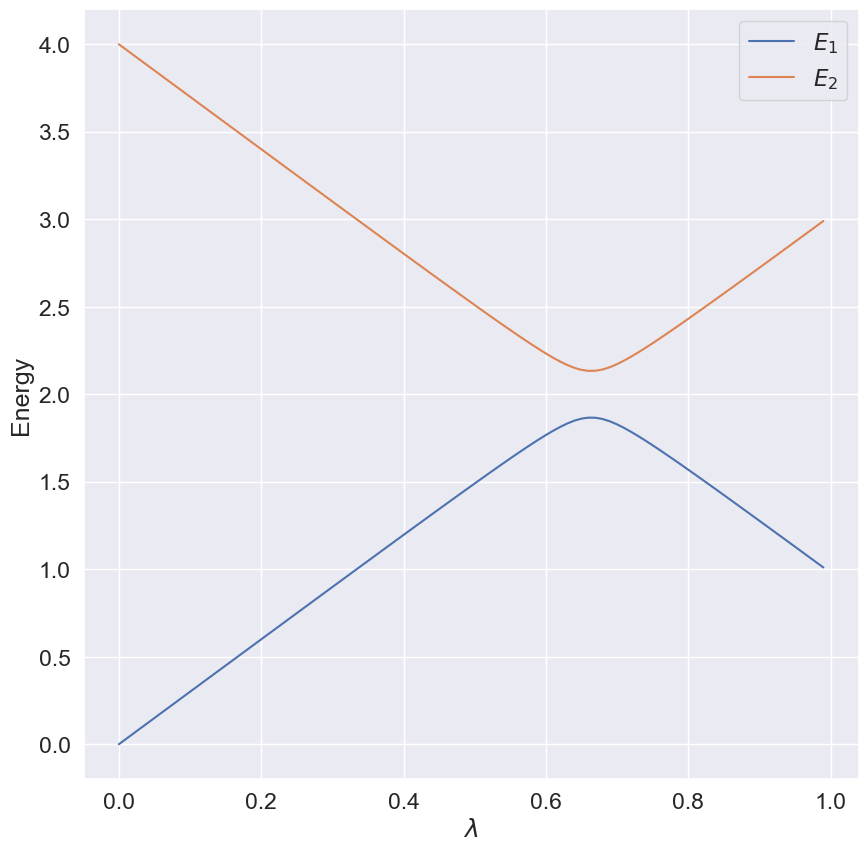

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=1.5)
from tqdm import tqdm

sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
I = np.eye(2)

def Hamiltonian(lmb):
    E1 = 0
    E2 = 4
    V11 = 3
    V22 = -3
    V12 = 0.2
    V21 = 0.2

    eps = (E1 + E2) / 2
    omega = (E1 - E2) / 2
    c = (V11 + V22) / 2
    omega_z = (V11 - V22) / 2
    omega_x = V12

    H0 = eps * I + omega * sigma_z
    H1 = c * I + omega_z * sigma_z + omega_x * sigma_x
    return H0 + lmb * H1
    
lmbvalues_ana = np.arange(0, 1, 0.01)
eigvals_ana = np.zeros((len(lmbvalues_ana), 2))
for index, lmb in enumerate(lmbvalues_ana):
    H = Hamiltonian(lmb)
    eigen, eigvecs = np.linalg.eig(H)
    permute = eigen.argsort()
    eigvals_ana[index] = eigen[permute]
    eigvecs = eigvecs[:,permute]


fig, axs = plt.subplots(1, 1, figsize=(10, 10))
for i in range(2):
    axs.plot(lmbvalues_ana, eigvals_ana[:,i], label=f'$E_{i+1}$')
axs.set_xlabel(r'$\lambda$')
axs.set_ylabel('Energy')
axs.legend()
plt.show()

This was the standard eigenvalue problem. Let us now switch to our own implementation of the VQE.

In [12]:
from src.qc import *

def prepare_state(theta, phi, target = None):
    I = np.eye(2)
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    state = np.array([1, 0])
    Rx = np.cos(theta/2) * I - 1j * np.sin(theta/2) * sigma_x
    Ry = np.cos(phi/2) * I - 1j * np.sin(phi/2) * sigma_y
    state = Ry @ Rx @ state
    if target is not None:
        state = target
    return state

def get_energy(angles, lmb, number_shots, target = None):
    theta, phi = angles[0], angles[1]
    # print(f'Theta = {theta}, Phi = {phi}')
    E1 = 0; E2 = 4; V11 = 3; V22 = -3; V12 = 0.2; V21 = 0.2

    eps = (E1 + E2) / 2; omega = (E1 - E2) / 2; c = (V11 + V22) / 2; omega_z = (V11 - V22) / 2; omega_x = V12

    init_state = prepare_state(theta, phi, target)
    qubit = One_qubit()
    qubit.set_state(init_state)
    measure_z = qubit.measure(number_shots)

    qubit.set_state(init_state)
    qubit.apply_hadamard()
    measure_x = qubit.measure(number_shots)
    
    # expected value of Z = (number of 0 measurements - number of 1 measurements)/ number of shots
    # number of 1 measurements = sum(measure_z)
    exp_val_z = (omega + lmb*omega_z)*(number_shots - 2*np.sum(measure_z)) / number_shots
    exp_val_x = lmb*omega_x*(number_shots - 2*np.sum(measure_x)) / number_shots
    exp_val_i = (eps + c*lmb) 
    exp_val = (exp_val_z + exp_val_x + exp_val_i)
    return exp_val

ModuleNotFoundError: No module named 'src'

In [13]:
def minimize_energy(lmb, number_shots, angles_0, learning_rate, max_epochs):
    # angles = np.random.uniform(low = 0, high = np.pi, size = 2)
    angles = angles_0 #lmb*np.array([np.pi, np.pi])
    epoch = 0
    delta_energy = 1
    energy = get_energy(angles, lmb, number_shots)
    while (epoch < max_epochs) and (delta_energy > 1e-4):
        grad = np.zeros_like(angles)
        for idx in range(angles.shape[0]):
            angles_temp = angles.copy()
            angles_temp[idx] += np.pi/2 
            E_plus = get_energy(angles_temp, lmb, number_shots)
            angles_temp[idx] -= np.pi 
            E_minus = get_energy(angles_temp, lmb, number_shots)
            grad[idx] = (E_plus - E_minus)/2 
        angles -= learning_rate*grad 
        new_energy = get_energy(angles, lmb, number_shots)
        delta_energy = np.abs(new_energy - energy)
        energy = new_energy
        epoch += 1
    return angles, epoch, (epoch < max_epochs), energy, delta_energy

In [14]:
number_shots_search = 10_000
number_shots = 10_000
learning_rate = 0.3
max_epochs = 400
lmbvalues = np.linspace(0.0, 1.0, 30)
min_energy = np.zeros(len(lmbvalues))
epochs = np.zeros(len(lmbvalues))
for index, lmb in enumerate(tqdm(lmbvalues)):
    memory = 0
    angles_0 = np.random.uniform(low = 0, high = np.pi, size = 2)
    angles, epochs[index], converged, energy, delta_energy = minimize_energy(lmb, number_shots_search, angles_0, learning_rate, max_epochs)
    if epochs[index] < (epochs[index-1] - 5):
        angles_0 = np.random.uniform(low = 0, high = np.pi, size = 2)
        angles, epochs[index], converged, energy, delta_energy = minimize_energy(lmb, number_shots_search, angles_0, learning_rate, max_epochs)
    min_energy[index] = get_energy(angles, lmb, number_shots)

In [15]:
from scipy.optimize import minimize
number_shots = 10_000
lmbvalues_scipy = np.linspace(0.0, 1.0, 50)
min_energy_scipy = np.zeros(len(lmbvalues_scipy))
for index, lmb in enumerate(tqdm(lmbvalues_scipy)):
    angles_start = np.random.uniform(low = 0, high = np.pi, size = 4)
    res = minimize(get_energy, angles_start, args = (lmb, number_shots), method = 'Powell', options = {'maxiter': 1000}, tol = 1e-5)
    min_energy_scipy[index] = res.fun

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
for i in range(2):
    axs.plot(lmbvalues_ana, eigvals_ana[:,i], label=f'$E_{i+1}$', color = '#4c72b0')
axs.scatter(lmbvalues, min_energy, label = 'VQE eigenvalues', color = '#dd8452')
axs.scatter(lmbvalues_scipy, min_energy_scipy, label = 'VQE Scipy', color = '#55a868')
axs.set_xlabel(r'$\lambda$')
axs.set_ylabel('Energy')
plt.legend()
plt.show()

## Lipkin model

We will study a schematic model (the Lipkin model, see Nuclear
Physics **62** (1965) 188), for the interaction among  $2$ and more 
fermions that can occupy two different energy levels.

For four fermions, the case we consider first here, each levels has
degeneration $d=4$, leading to different total spin values.  The two
levels have quantum numbers $\sigma=\pm 1$, with the upper level
having $2\sigma=+1$ and energy $\varepsilon_{1}= \varepsilon/2$. The
lower level has $2\sigma=-1$ and energy
$\varepsilon_{2}=-\varepsilon/2$. That is, the lowest single-particle
level has negative spin projection (or spin down), while the upper
level has spin up.  In addition, the substates of each level are
characterized by the quantum numbers $p=1,2,3,4$.

We define the single-particle states (for the four fermion case which we will work on here)

$$
\vert u_{\sigma =-1,p}\rangle=a_{-p}^{\dagger}\vert 0\rangle
\hspace{1cm}
\vert u_{\sigma =1,p}\rangle=a_{+p}^{\dagger}\vert 0\rangle.
$$

The single-particle states span an orthonormal basis.
The Hamiltonian of the system is given by

$$
\begin{array}{ll}
\hat{H}=&\hat{H}_{0}+\hat{H}_{1}+\hat{H}_{2}\\
&\\
\hat{H}_{0}=&\frac{1}{2}\varepsilon\sum_{\sigma ,p}\sigma
a_{\sigma,p}^{\dagger}a_{\sigma ,p}\\
&\\
\hat{H}_{1}=&\frac{1}{2}V\sum_{\sigma ,p,p'}
a_{\sigma,p}^{\dagger}a_{\sigma ,p'}^{\dagger}
a_{-\sigma ,p'}a_{-\sigma ,p}\\
&\\
\hat{H}_{2}=&\frac{1}{2}W\sum_{\sigma ,p,p'}
a_{\sigma,p}^{\dagger}a_{-\sigma ,p'}^{\dagger}
a_{\sigma ,p'}a_{-\sigma ,p}\\
&\\
\end{array}
$$

where $V$ and $W$ are constants. The operator 
$H_{1}$ can move pairs of fermions
while $H_{2}$ is a spin-exchange term. The latter
moves a pair of fermions from a state $(p\sigma ,p' -\sigma)$ to a state
$(p-\sigma ,p'\sigma)$.

We are going to rewrite the above Hamiltonian in terms of so-called  quasispin operators

$$
\begin{array}{ll}
\hat{J}_{+}=&\sum_{p}
a_{p+}^{\dagger}a_{p-}\\
&\\
\hat{J}_{-}=&\sum_{p}
a_{p-}^{\dagger}a_{p+}\\
&\\
\hat{J}_{z}=&\frac{1}{2}\sum_{p\sigma}\sigma
a_{p\sigma}^{\dagger}a_{p\sigma}\\
&\\
\hat{J}^{2}=&J_{+}J_{-}+J_{z}^{2}-J_{z}\\
&\\
\end{array}
$$

We show here that these operators obey the commutation relations for angular momentum.

We can in turn express $\hat{H}$ in terms of the above quasispin operators and the number operator

$$
\hat{N}=\sum_{p\sigma}
a_{p\sigma}^{\dagger}a_{p\sigma}.
$$

We have the following quasispin operators

<!-- Equation labels as ordinary links -->
<div id="eq:Jpm"></div>

$$
\begin{equation}
J_{\pm} = \sum_p a_{p\pm}^\dagger a_{p\mp},
\label{eq:Jpm} \tag{10} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:Jz"></div>

$$
\begin{equation} 
J_{z} = \frac{1}{2}\sum_{p,\sigma} \sigma a_{p\sigma}^\dagger a_{p\sigma},
\label{eq:Jz} \tag{11} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:J2"></div>

$$
\begin{equation} 
J^{2} = J_+ J_- + J_z^2 - J_z,
\label{eq:J2} \tag{12}
\end{equation}
$$

and we want to compute the commutators

$$
[J_z,J_\pm], \quad [J_+,J_-], \quad [J^2,J_\pm] \quad \text{og} \quad 
[J^2,J_z].
$$

Let us start with the first one and inserting for  $J_z$ and $J_\pm$ given by the equations ([11](#eq:Jz)) and ([10](#eq:Jpm)), respectively, we obtain

$$
\begin{align*}
[J_z,J_\pm] &= J_z J_\pm - J_\pm J_z \\
%
&= \left( \frac{1}{2}\sum_{p,\sigma} \sigma a_{p\sigma}^\dagger a_{p\sigma} \right)
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right) -
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right)
\left( \frac{1}{2}\sum_{p,\sigma} \sigma a_{p\sigma}^\dagger a_{p\sigma} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left( a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} - a_{p'\pm}^\dagger a_{p'\mp} a_{p\sigma}^\dagger a_{p\sigma} \right).
\end{align*}
$$

Using the commutation relations for the creation and annihilation operators

<!-- Equation labels as ordinary links -->
<div id="eq:al,ak"></div>

$$
\begin{equation}
\{ a_l,a_k \} = 0, \label{eq:al,ak} \tag{13} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:ald,akd"></div>

$$
\begin{equation} 
\{ a_l^\dagger , a_k^\dagger \} = 0, \label{eq:ald,akd} \tag{14} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:ald,ak"></div>

$$
\begin{equation} 
\{ a_l^\dagger , a_k \} = \delta_{lk}, \label{eq:ald,ak} \tag{15}
\end{equation}
$$

in order to move the operators in the right product to be in the same order as those in the lefthand product

$$
\begin{align*}
[J_z,J_\pm] &= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \left( \delta_{p' p} \delta_{\mp \sigma} - a_{p\sigma}^\dagger a_{p'\mp} \right) a_{p\sigma} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{p' p} \delta_{\mp \sigma} a_{p\sigma} +
a_{p'\pm}^\dagger a_{p\sigma}^\dagger a_{p'\mp} a_{p\sigma} \right), \\
\end{align*}
$$

which results in

$$
\begin{align*}
[J_z,J_\pm]
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{pp'} \delta_{\mp \sigma} a_{p\sigma} +
a_{p\sigma}^\dagger a_{p'\pm}^\dagger a_{p\sigma} a_{p'\mp} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{pp'} \delta_{\mp \sigma} a_{p\sigma} +
a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{\pm \sigma} - a_{p\sigma} a_{p'\pm}^\dagger \right) a_{p'\mp} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger \delta_{pp'} \delta_{\pm \sigma} a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{pp'} \delta_{\mp \sigma} a_{p\sigma} \right). \\
\end{align*}
$$

The last equality leads to

$$
\begin{align*}
[J_z,J_\pm] &= \frac{1}{2} \sum_p \left(
(\pm 1) a_{p\pm}^\dagger a_{p\mp} - (\mp 1)
a_{p\pm}^\dagger a_{p\mp} \right) =
\pm \frac{1}{2} \sum_p \left(
a_{p\pm}^\dagger a_{p\mp} + (\pm 1)
a_{p\pm}^\dagger a_{p\mp} \right) \\
&= \pm \sum_p a_{p\pm}^\dagger a_{p\mp} = \pm J_\pm,
\end{align*}
$$

where the last results follows from comparing with Eq. ([10](#eq:Jpm)).

We can then continue with the next commutation relation, using Eq. ([10](#eq:Jpm)),

$$
\begin{align*}
[J_+,J_-] &= J_+ J_- - J_- J_+ \\
&= \left( \sum_p a_{p'+}^\dagger a_{p-} \right)
\left( \sum_{p'} a_{p'-}^\dagger a_{p'+} \right) -
\left( \sum_{p'} a_{p'-}^\dagger a_{p'+} \right)
\left( \sum_p a_{p+}^\dagger a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger a_{p'+} a_{p+}^\dagger a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \left( \delta_{++} \delta_{pp'} -
a_{p+}^\dagger a_{p'+} \right) a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} +
a_{p'-}^\dagger a_{p+}^\dagger a_{p'+} a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} +
a_{p+}^\dagger a_{p'-}^\dagger a_{p-} a_{p'+} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} +
a_{p+}^\dagger \left( \delta_{--} \delta_{pp'} -
a_{p-} a_{p'-}^\dagger \right) a_{p'+} \right) \\
&= \sum_{p,p'} \left(
a_{p+}^\dagger \delta_{pp'} a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} \right), \\
\end{align*}
$$

which results in

$$
[J_+,J_-] = \sum_p \left(
a_{p+}^\dagger a_{p+} -
a_{p-}^\dagger a_{p-} \right) = 2J_z,
$$

It is straightforward to show that

$$
[J^2, J_\pm] = [J_+ J_- + J_z^2 - J_z, J_\pm] =
[J_+ J_-, J_\pm] + [J_z^2, J_\pm] - [J_z, J_\pm].
$$

Using the relations

<!-- Equation labels as ordinary links -->
<div id="eq:ab,c"></div>

$$
\begin{equation}
[AB,C] = A[B,C] + [A,C]B, \label{eq:ab,c} \tag{16} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:a,bc"></div>

$$
\begin{equation} 
[A,BC] = [A,B]C + B[A,C], \label{eq:a,bc} \tag{17}
\end{equation}
$$

we obtain

$$
[J^2, J_\pm] =
J_+ [J_-,J_\pm] + [J_+,J_\pm] J_- + J_z [J_z,J_\pm] + [J_z,J_\pm] J_z - [J_z,J_\pm].
$$

Finally, from the above it follows that

$$
\begin{align*}
[J^2, J_+] &= -2J_+ J_z + J_z [J_z,J_+] + [J_z,J_+] J_z - [J_z,J_+] \\
&= -2J_+ J_z + J_z J_+ + J_+ J_z - J_+ \\
&= -2J_+ J_z + J_+ + J_+ J_z + J_+ J_z - J_+ = 0,
\end{align*}
$$

and

$$
\begin{align*}
[J^2, J_-] &= 2J_z J_- + J_z [J_z,J_-] + [J_z,J_-] J_z - [J_z,J_-] \\
&= 2J_z J_- - J_z J_- - J_- J_z + J_- \\
&= J_z J_- - (J_z J_- + J_-) + J_- = 0.
\end{align*}
$$

Our last commutator is given by

$$
\begin{align*}
[J^2,J_z] &= [J_+ J_- + J_z^2 - J_z, J_z] \\
&= [J_+ J_-, J_z] + [J_z^2, J_z] - [J_z, J_z] \\
&= J_+ [J_-, J_z] + [J_+,J_z] J_- \\
&= J_+ J_- - J_+ J_- = 0
\end{align*}
$$

Summing up we have

<!-- Equation labels as ordinary links -->
<div id="eq:kJzJpm"></div>

$$
\begin{equation}
[J_z, J_\pm] = \pm J_\pm, \label{eq:kJzJpm} \tag{18} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:kJpJm"></div>

$$
\begin{equation} 
[J_+, J_-] = 2J_z, \label{eq:kJpJm} \tag{19} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:kJ2Jpm"></div>

$$
\begin{equation} 
[J^2, J_\pm] = 0, \label{eq:kJ2Jpm} \tag{20} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:kJ2Jz"></div>

$$
\begin{equation} 
[J^2,J_z] = 0, \label{eq:kJ2Jz} \tag{21}
\end{equation}
$$

which are the standard commutation relations for angular (or orbital) momentum $L_\pm$, $L_z$ og $L^2$.

## Rewriting the Hamiltonian

We wrote the above Hamiltonian as

$$
H = H_0 + H_1 +H_2,
$$

with

$$
H_0 = \frac{1}{2} \varepsilon \sum_{p\sigma}\sigma a_{p\sigma}^{\dagger}a_{p\sigma},
$$

and

$$
H_1 = \frac{1}{2} V \sum_{p,p',\sigma} a_{p\sigma}^\dagger a_{p'\sigma}^\dagger a_{p'-\sigma} a_{p-\sigma},
$$

and

$$
H_{2} = \frac{1}{2} W \sum_{p,p',\sigma}a_{p\sigma}^\dagger a_{p'-\sigma}^\dagger a_{p'\sigma}a_{p-\sigma}.
$$

We will now rewrite the Hamiltonian in terms of the above quasi-spin operators and the number operator

<!-- Equation labels as ordinary links -->
<div id="eq:N"></div>

$$
\begin{equation}
N = \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma}.
\label{eq:N} \tag{22}
\end{equation}
$$

Going through each term of the Hamiltonian and using the expressions for the quasi-spin operators we obtain

<!-- Equation labels as ordinary links -->
<div id="eq:H0ny"></div>

$$
\begin{equation}
H_0 = \varepsilon J_z.
\label{eq:H0ny} \tag{23}
\end{equation}
$$

Moving over to $H_1$ and using the anti-commutation relations ([13](#eq:al,ak)) through ([15](#eq:ald,ak)) we obtain

$$
\begin{align*}
H_1 &= \frac{1}{2} V \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p'\sigma}^\dagger a_{p'-\sigma} a_{p-\sigma} \\
&= \frac{1}{2} V \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger a_{p'\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma} \\
&= \frac{1}{2} V \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{\sigma -\sigma} - a_{p-\sigma} a_{p'\sigma}^\dagger \right) a_{p'-\sigma} \\
&= \frac{1}{2} V \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p-\sigma} a_{p'\sigma}^\dagger a_{p'-\sigma} \\
\end{align*}
$$

Rewriting the sum  over $\sigma$ we arrive at

$$
\begin{align*}
H_1 &= \frac{1}{2} V\sum_{p,p'}
a_{p+}^\dagger a_{p-} a_{p'+}^\dagger a_{p'-} +
a_{p-}^\dagger a_{p+} a_{p'-}^\dagger a_{p'+} \\
&= \frac{1}{2} V \left[ \sum_p \left( a_{p+}^\dagger a_{p-} \right)
\sum_{p'} \left( a_{p'+}^\dagger a_{p'-} \right) +
\sum_p \left( a_{p-}^\dagger a_{p+} \right)
\sum_{p'} \left( a_{p'-}^\dagger a_{p'+} \right) \right] \\
&= \frac{1}{2} V \left[ J_+ J_+ + J_- J_- \right] = \frac{1}{2} V \left[ J_+^2 + J_-^2 \right] ,
\end{align*}
$$

which leads to

<!-- Equation labels as ordinary links -->
<div id="eq:H1ny"></div>

$$
\begin{equation}
H_1 = \frac{1}{2} V \left( J_+^2 + J_-^2 \right).
\label{eq:H1ny} \tag{24}
\end{equation}
$$

Finally, we rewrite the last term

$$
\begin{align*}
H_2 &= \frac{1}{2} W \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p'-\sigma}^\dagger a_{p'\sigma} a_{p-\sigma} \\
&= \frac{1}{2} W \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger a_{p'-\sigma}^\dagger a_{p-\sigma} a_{p'\sigma} \\
&= \frac{1}{2} W \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{-\sigma -\sigma} -
a_{p-\sigma} a_{p'-\sigma}^\dagger \right) a_{p'\sigma} \\
&= \frac{1}{2} W \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger \delta_{pp'} a_{p'\sigma} +
a_{p\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma}^\dagger a_{p'\sigma} \\
&= \frac{1}{2} W \left( -\sum_{p,\sigma}
a_{p\sigma}^\dagger a_{p\sigma} +
\sum_{p,p',\sigma} a_{p\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma}^\dagger a_{p'\sigma} \right) \\
\end{align*}
$$

Using the expression for the number operator we obtain

$$
\begin{align*}
\sum_{p,p',\sigma} a_{p\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma}^\dagger a_{p'\sigma}
&= \sum_{p,p'} a_{p+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} +
a_{p-}^\dagger a_{p+} a_{p'+}^\dagger a_{p'-} \\
&= \sum_p \left( a_{p+}^\dagger a_{p-} \right)
\sum_{p'} \left( a_{p'-}^\dagger a_{p'+} \right) +
\sum_p \left( a_{p-}^\dagger a_{p+} \right)
\sum_{p'} \left( a_{p'+}^\dagger a_{p'-} \right) \\
&= J_+ J_- + J_- J_+,
\end{align*}
$$

resulting in

<!-- Equation labels as ordinary links -->
<div id="eq:H2ny"></div>

$$
\begin{equation}
H_2 = \frac{1}{2} W \left( -N + J_+ J_- + J_- J_+ \right).
\label{eq:H2ny} \tag{25}
\end{equation}
$$

We have thus expressed the Hamiltonian in term of the quasi-spin operators.
Below, we will show how we can rewrite these expressions in terms of Pauli $X$, $Y$ and $Z$ matrices.

## Commutation relations for the Hamiltonian

The above expressions can in turn be used to show that the Hamiltonian
commutes with the various quasi-spin operators. This leads to quantum
numbers which are conserved.  Let us first show that $[H,J^2]=0$,
which means that $J$ is a so-called *good* quantum number and that the
total spin is a conserved quantum number.

We have

$$
\begin{align*}
[H,J^2] &= [H_0 + H_1 + H_2,J^2] \\
&= [H_0,J^2] + [H_1,J^2] + [H_2,J^2] \\
&= \varepsilon [J_z,J^2] + \frac{1}{2} V [J_+^2 + J_-^2,J^2] +
\frac{1}{2} W [-N + J_+ J_- + J_- J_+,J^2]. \\
\end{align*}
$$

We have previously shown that

$$
[H,J^2] = \frac{1}{2} V \left( [J_+^2,J^2] + [J_-^2,J^2] \right) +
\frac{1}{2} W \left( -[N,J^2] + [J_+ J_-,J^2] + [J_- J_+, J^2] \right)
$$

Using that $[J_\pm,J^2] = 0$, it follows that $[J_\pm^2,J^2] = 0$. We can then see that $[J_+ J_-,J^2] = 0$ and $[J_- J_+, J^2] = 0$ which leads to

$$
\begin{align*}
[H,J^2] &= -\frac{1}{2} W [N,J^2] \\
&= \frac{1}{2} W \left( -[N,J_+ J_-] - [N,J_z^2] + [N,J_z] \right) \\
&= \frac{1}{2} W \left( -[N,J_+]J_- - J_+[N,J_-] - [N,J_z]J_z - J_z[N,J_z] + [N,J_z] \right).
\end{align*}
$$

Combining with the number operator we have

$$
\begin{align*}
[N,J_\pm] &= N J_\pm - J_\pm N \\
&= \left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right)
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right) -
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right)
\left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right) \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger a_{p'\mp} a_{p\sigma}^\dagger a_{p\sigma} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \left( \delta_{\mp \sigma} \delta_{pp'} - a_{p\sigma}^\dagger a_{p'\mp} \right) a_{p\sigma} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{\mp \sigma} \delta_{pp'} a_{p\sigma} +
a_{p'\pm}^\dagger a_{p\sigma}^\dagger a_{p'\mp} a_{p\sigma} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} +
a_{p\sigma}^\dagger a_{p'\pm}^\dagger a_{p\sigma} a_{p'\mp} -
\sum_{p} a_{p\pm}^\dagger  a_{p\mp} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} +
a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{\pm \sigma} -
a_{p\sigma} a_{p'\pm}^\dagger \right) a_{p'\mp} -
\sum_{p} a_{p\pm}^\dagger  a_{p\mp} \\
&= \sum_p a_{p\pm}^\dagger a_{p\mp} -
\sum_{p} a_{p\pm}^\dagger  a_{p\mp} = 0. \\
\end{align*}
$$

We obtain then

$$
\begin{align*}
[N,J_z] &= N J_z - J_z N \\
&= \left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right)
\left( \frac{1}{2}\sum_{p',\sigma} \sigma a_{p'\sigma}^\dagger a_{p'\sigma} \right) -
\left( \frac{1}{2}\sum_{p',\sigma} \sigma a_{p'\sigma}^\dagger a_{p'\sigma} \right)
\left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right) \\
&= \sum_{p,p',\sigma} 
\sigma a_{p\sigma}^\dagger a_{p\sigma} a_{p'\sigma}^\dagger a_{p'\sigma} -
\sigma a_{p'\sigma}^\dagger a_{p'\sigma} a_{p\sigma}^\dagger a_{p\sigma} = 0,
\end{align*}
$$

which leads to

<!-- Equation labels as ordinary links -->
<div id="eq:kHJ2"></div>

$$
\begin{equation}
[H,J^2] = 0,
\label{eq:kHJ2} \tag{26}
\end{equation}
$$

and $J$ is a good quantum number.

## Constructing the Hamiltonian matrix for $J=2$

We start with the state (unique) where all spins point down

<!-- Equation labels as ordinary links -->
<div id="eq:2,-2"></div>

$$
\begin{equation}
\vert 2,-2\rangle = a_{1-}^{\dagger} a_{2-}^{\dagger}
a_{3-}^{\dagger} a_{4-}^{\dagger} \vert 0\rangle
\label{eq:2,-2} \tag{27}
\end{equation}
$$

which is a state with  $J_z = -2$ and $J = 2$. (we label the states as $\vert J,J_z\rangle$). For $J = 2$ we have the spin projections $J_z = -2,-1,0,1,2$.
We can use the lowering and raising operators for spin in order to define the other states

<!-- Equation labels as ordinary links -->
<div id="eq:J+ket"></div>

$$
\begin{equation}
J_+ \vert J,J_z\rangle = \sqrt{J(J+1) - J_z(J_z + 1)} \vert J,J_z + 1\rangle,
\label{eq:J+ket} \tag{28} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:J-ket"></div>

$$
\begin{equation} 
J_- \vert J,J_z\rangle = \sqrt{J(J+1) - J_z(J_z - 1)} \vert J,J_z - 1\rangle.
\label{eq:J-ket} \tag{29}
\end{equation}
$$

We can then construct all other states with $J=2$ using the raising operator
$J_+$ on $\vert 2,-2\rangle$

$$
J_+ \vert 2,-2\rangle = \sqrt{2(2+1) - (-2)(-2+1)} \vert 2,-2+1\rangle =\sqrt{6 - 2} \vert 2,-1\rangle = 2\vert 2,-1\rangle,
$$

which gives

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
\vert 2,-1\rangle = \frac{1}{2} J_+ \vert 2,-2\rangle \notag 
\label{_auto9} \tag{30}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation} 
= \frac{1}{2} \sum_p a_{p+}^\dagger a_{p-} a_{1-}^{\dagger} a_{2-}^{\dagger}
a_{3-}^{\dagger} a_{4-}^{\dagger} \vert 0\rangle \notag 
\label{_auto10} \tag{31}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:2,-1"></div>

$$
\begin{equation} 
= \frac{1}{2} \left(
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3-}^{\dagger} a_{4-}^{\dagger} +
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4-}^{\dagger} +
a_{1-}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} +
a_{1-}^{\dagger} a_{2-}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger}
\right) \vert 0\rangle. \label{eq:2,-1} \tag{32}
\end{equation}
$$

We can construct all the other states in the same way. That is

$$
J_+ \vert 2,-1\rangle = \sqrt{2(2+1) - (-1)(-1+1)} \vert 2,-1+1\rangle = \sqrt{6} \vert 2,0\rangle,
$$

which results in

<!-- Equation labels as ordinary links -->
<div id="eq:2,0"></div>

$$
\begin{equation}
\begin{aligned}
\vert 2,0\rangle &= \frac{1}{\sqrt{6}} \left(
a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4-}^{\dagger} +
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} +
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger} +
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} + \right. \\
&\quad\,\, \left.
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger} +
a_{1-}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger} \right) \vert 0\rangle
\end{aligned}
\label{eq:2,0} \tag{33}
\end{equation}
$$

The two remaining states are

<!-- Equation labels as ordinary links -->
<div id="eq:2,1"></div>

$$
\begin{equation}
\vert2,1\rangle  = \frac{1}{2} \left(
a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} +
a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger} +
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger} +
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger}
 \right).
\label{eq:2,1} \tag{34}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="eq:2,2"></div>

$$
\begin{equation}
\vert 2,2\rangle  = a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger} \vert 0\rangle.
\label{eq:2,2} \tag{35}
\end{equation}
$$

These five states can in turn be used as computational basis states in
order to define the Hamiltonian matrix to be diagonalized.
The matrix elements are given by $\langle J,J_z \vert H \vert J',J_z' \rangle$.
The
Hamiltonian is hermitian and we obtain after all this labor of ours

<!-- Equation labels as ordinary links -->
<div id="eq:HJ=2"></div>

$$
\begin{equation}
H_{J = 2} =
\begin{bmatrix}
-2\varepsilon & 0 & \sqrt{6}V & 0 & 0 \\
0 & -\varepsilon + 3W & 0 & 3V & 0 \\
\sqrt{6}V & 0 & 4W & 0 & \sqrt{6}V \\
0 & 3V & 0 & \varepsilon + 3W & 0 \\
0 & 0 & \sqrt{6}V & 0 & 2\varepsilon
\end{bmatrix}
\label{eq:HJ=2} \tag{36}
\end{equation}
$$

We can now select a set of parameters and diagonalize the above matrix. We select $\epsilon = 2$, $V = -1/3$, $W = -1/4$ and our matrix becoes

$$
H_{J=2}^{(1)} =
\begin{bmatrix}
-4 & 0 & -\sqrt{6}/3 & 0 & 0 \\
0 & -2 - 3/4 & 0 & -1 & 0 \\
-\sqrt{6}/3 & 0 & -1 & 0 & -\sqrt{6}/3 \\
0 & -1 & 0 & 2 + -3/4 & 0 \\
0 & 0 & -\sqrt{6}/3 & 0 & 4
\end{bmatrix},
$$

which gives the eigenvalue

$$
D = \begin{bmatrix}
-4.21288 &  0 &  0 &  0 &  0 \\
0 & -2.98607  & 0  & 0  & 0 \\
0 &  0 & -0.91914  & 0  & 0 \\
0 &  0 & 0   & 1.48607  & 0 \\
0 &  0  & 0  & 0  & 4.13201
\end{bmatrix}.
$$

The lowest state has an admixture of basis states given by

$$
\vert \psi_0\rangle = 0.96735\vert2,-2\rangle + 0.25221\vert 2,0\rangle + 0.02507\vert 2,2\rangle,
$$

with energy $E_0 = -4.21288$.

We can now change the parameters to
$\varepsilon = 2$, $V = -4/3$, $W = -1$. Our matrix reads then

$$
H_{J=2}^{(2)} =
\begin{bmatrix}
-4 & 0 & -4\sqrt{6}/3 & 0 & 0 \\
0 & -5 & 0 & -4 & 0 \\
-4\sqrt{6}/3 & 0 & -4 & 0 & -4\sqrt{6}/3 \\
0 & -4 & 0 & -1 & 0 \\
0 & 0 & -4\sqrt{6}/3 & 0 & 4
\end{bmatrix},
$$

with the following eigenvalues

$$
D = \begin{bmatrix}
-7.75122 &  0 &  0 &  0  & 0 \\
0 & -7.47214  & 0  & 0  & 0 \\
0 &  0  & -1.55581 &  0  & 0 \\
0 &  0  & 0  & 1.47214  & 0 \\
0 &  0  & 0  & 0  & 5.30704
\end{bmatrix}.
$$

The new ground state (lowest state) has the following admixture of computational basis states

$$
\vert \psi_0\rangle = 0.64268\vert 2,-2\rangle + 0.73816\vert 2,0\rangle + 0.20515 \vert 2,2\rangle,
$$

with energy $E_0 = -7.75122$.

For the first set of parameters, the likelihood for observing the
system in the computational basis state $\vert 2,-2 \rangle$ is rather
large. This is expected since the interaction matrix elements are
smaller than the single-particle energies.  For the second case, with
larger matrix elements, we see a much stronger mixing of the other
states, again as expected due to the ratio of the interaction matrix
elements and the single-particle energies.

## Reminder from last week on Expectation values

To execute the second step of VQE, we need to understand how
expectation values of operators can be estimated via quantum computers
by post-processing measurements of quantum circuits in different
basis. To rotate bases, one uses the basis rotator $R_\sigma$ which is
defined for each Pauli gate $\sigma$ to be

<!-- Equation labels as ordinary links -->
<div id="eq:auto8"></div>

$$
\begin{equation}
R_{\sigma} = H,  \text{if} \ \sigma = X,
\end{equation} \label{eq:auto8} \tag{37}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
HS^{\dagger},  \text{if} \ \sigma = Y,
\label{_auto11} \tag{38}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
I,  \text{if} \ \sigma = Z.
\label{_auto12} \tag{39}
\end{equation}
$$

We can show that these rotations allow us to measure the eigenvalues of the Pauli operators. The eigenvectors of the Pauli $X$ gate are

$$
\vert\pm\rangle = \frac{\vert 0\rangle \pm \vert 1\rangle}{\sqrt{2}},
$$

with eigenvalues $\pm 1$.
Acting on the eigenstates with the rotation in eq. ([37](#eq:auto8)) gives

$$
H\vert +\rangle = +1\vert 0\rangle,
$$

and

$$
H\vert -\rangle = -1\vert 1\rangle.
$$

Any single-qubit state can be written as a linear combination of these eigenvectors,

$$
\vert \psi\rangle = \alpha \vert +\rangle + \beta \vert -\rangle.
$$

We then have the following expectation value for the Pauli $X$ operator

$$
\\angle X\rangle  = \langle \psi\vert X \vert \psi\rangle = |\alpha|^2 - |\beta|^2.
$$

However, we can only measure the qubits in the computational basis. Applying the rotation in eq. ([37](#eq:auto8)) to our state gives

$$
H \vert \psi\rangle = \alpha \vert 0\rangle - \beta \vert 1\rangle.
$$

This tells us that we are able to estimate $|\alpha|^2$ and
$|\beta|^2$ (and hence the expectation value of the Pauli $X$
operator) by using the rotation in eq. ([37](#eq:auto8)) and measure the
resulting state in the computational basis. We can show this for the
Pauli $Z$ and Pauli $Y$ similarly.

Note the following identity of the basis rotator

$$
R^\dagger_\sigma Z R_\sigma = \sigma,
$$

which follows from the fact that $HZH=X$ and $SXS^\dagger=Y$. With this, we see that the expectation value of an arbitrary
Pauli-gate $\sigma$ in the state $\vert\psi\rangle$ can be expressed as a linear combination of probabilities

$$
E_{\psi}(\sigma)
= \langle \psi\vert\sigma\vert\psi\rangle \nonumber
$$

$$
=\langle\psi\vert R_{\sigma}^{\dagger}ZR_{\sigma}\vert\psi\rangle =\langle \phi\vert Z\vert \phi\rangle \nonumber
$$

$$
=\langle\phi\vert\left(\sum_{x\in\{0,1\}}(-1)^x\vert x\rangle\langle x\vert\right)\vert\phi\rangle \nonumber
$$

$$
=\sum_{x\in\{0,1\}}(-1)^x\vert\langle x\vert \phi\rangle\vert^2\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation} 
=\sum_{x\in\{0,1\}}(-1)^xP(\vert \phi\rangle\to\vert x\rangle),
\label{_auto13} \tag{40}
\end{equation}
$$

where $\vert \phi\rangle=\vert R_\sigma\phi\rangle$ and
$P(\vert \phi\rangle\to\vert x\rangle$ is the probability that the state
$\vert \phi\rangle$ collapses to the state $\vert x\rangle$ when measured. This can
be extended to any arbitrary Pauli string: consider the string of
Pauli operators $P=\bigotimes_{p\in Q}\sigma_p$ which acts
non-trivially on the set of qubits $Q$ which is a subset of the total
set of $n$ qubits in the system. Then

$$
E_{\psi}\left(P\right)
=\langle \psi\vert\left(\bigotimes_{p\in Q}\sigma_p\right)\vert \psi\rangle \nonumber
$$

$$
=\langle \psi\vert\left(\bigotimes_{p\in Q}\sigma_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)\vert \psi\rangle \nonumber
$$

$$
=\langle \psi\vert\left(\bigotimes_{p \in Q}R_{\sigma_p}^{\dagger}Z_pR_{\sigma_p}\right)
\left(\bigotimes_{q\notin Q}I_q\right)\vert \psi\rangle \nonumber
$$

$$
=
\langle \psi\vert\left(\bigotimes_{p \in Q}R_{\sigma_p}^{\dagger}\right)
\left(\bigotimes_{p \in Q}Z_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)
\left(\bigotimes_{p \in Q}R_{\sigma_p}\right)\vert \psi\rangle \nonumber
$$

$$
=
\langle \phi\vert
\left(\bigotimes_{p \in Q}Z_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)
\vert \phi\rangle \nonumber
$$

$$
=
\langle \phi\vert
\left(\bigotimes_{p\in Q}\sum_{x_p\in\{0_p,1_p\}}(-1)^{x_p}\vert x_p\rangle\langle x_p\vert\right)
\left(\bigotimes_{q\notin Q}\sum_{y_q\in\{0_q,1_q\}}\vert y_q\rangle\langle y_q\vert\right)
\vert \phi\rangle 
\nonumber
$$

$$
=
\langle \phi\vert
\left(\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}\vert x\rangle\langle x\vert\right)
\vert \phi\rangle 
\nonumber
$$

$$
=
\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}\vert\langle x\vert\vert \phi\rangle\vert^2
\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation} 
=
\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}P(\vert \phi\rangle\to\vert x\rangle),
\label{_auto14} \tag{41}
\end{equation}
$$

where $\vert \phi\rangle=\vert \bigotimes_{p\in
Q}R_{\sigma_p}\psi\rangle$. Finally, because the expectation value is
linear

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
E_\psi\left(\sum_{m}\lambda_mP_m\right) = \sum_m\lambda_mE_\psi(P_m),
\label{_auto15} \tag{42}
\end{equation}
$$

one can estimate any observable that can be written as a linear combination of Pauli-string terms.

## Measurement

To estimate the probability $P(\vert \phi\rangle\to \vert x\rangle)$ from the
formalism above, one prepares the state $\vert \phi\rangle$ on a quantum
computer and measures it, and then we repeat this process (prepare and
measure) several times. The probability $P(\vert \phi\rangle\to \vert x\rangle)$ is
estimated to be the number of times that one measures the bit-string
$x$ divided by the total number of measurements that one makes; that

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}
P(\vert \phi\rangle\to \vert x\rangle\rangle \approx \sum_{m=1}^M\frac{x_m}{M},
\label{_auto16} \tag{43}
\end{equation}
$$

where $x_m=1$
if the result of measurement is $x$ and  $0$ if the result of measurement is not $x$.

By the law of large numbers the approximation approaches equality as
$M$ goes to infinity

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
P(\vert \phi\rangle\to \vert x\rangle) = \lim_{M\to\infty}\sum_{m=1}^M\frac{x_m}{M}.
\label{_auto17} \tag{44}
\end{equation}
$$

As we obviously do not have infinite time nor infinite quantum
computers (which could be run in parallel), we must truncate our
number of measurement $M$ to a finite, but sufficiently large
number. More precisely, for precision $\epsilon$, each expectation
estimation subroutine within VQE requires $\mathcal{O}(1/\epsilon^2)$
samples from circuits with depth $\mathcal{O}(1)$.

## Quantum computing and solving  the eigenvalue problem for the Lipkin model

We turn now to a simpler variant of the Lipkin model without the $W$-term and a total spin of $J=1$ only as maximum value of the spin.
This corresponds to a system with $N=2$ particles (fermions in our case).
Our Hamiltonian is given by the quasispin operators (see below)

$$
\hat{H} = \epsilon\hat{J}_z -\frac{1}{2}V(\hat{J}_+\hat{J}_++\hat{J}_-\hat{J}_-).
$$

As discussed earlier
the quasispin operators act like lowering and raising angular momentum
operators.

With these properties we can calculate the Hamiltonian
matrix for the Lipkin model by computing the various matrix elements

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation}
\langle JJ_z|H|JJ_z'\rangle,
\label{_auto18} \tag{45}
\end{equation}
$$

where the non-zero elements are given by

$$
\begin{split}
\langle JJ_z|H|JJ_z'\rangle & = \epsilon J_z\\
\langle JJ_z|H|JJ_z'\pm 2\rangle & = \langle JJ_z\pm 2|H|JJ_z'\rangle \\ &= -\frac{1}{2}VC,
\end{split}
$$

where $C$ is the Clebsch-Gordan coefficients (from the raising and lowering operators) one gets when
$J_{\pm}^2$ operates on the state $|JJ_z\rangle$.  Using the above
definitions we can calculate the exact solution to the Lipkin model.

With the $V$-interaction terms, we obtain the following Hamiltonian matrix

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation}
\begin{pmatrix}-\epsilon & 0 & -V\\
 0&0&0\\
 -V&0&\epsilon
\end{pmatrix}
\label{_auto19} \tag{46}
\end{equation}
$$

The following **python** code sets up the above matrix and finds the pertinent eigenvalues.

In [17]:
import numpy as np
import qiskit
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
from matplotlib.pyplot import figure
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, assemble
from qiskit.providers.aer.noise import NoiseModel
import pylatexenc
from qiskit.algorithms import VQE
from qiskit.utils import QuantumInstance
from qiskit.opflow import X, Z, I, Y
from qiskit.circuit import Parameter
from qiskit.algorithms.optimizers import ADAM
from qiskit.opflow import AerPauliExpectation
from qiskit import IBMQ
import cmath
import pandas as pd
from scipy.sparse import diags
import numpy.linalg as LA
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
pi=np.pi

In [18]:
#function that sorts eigenvalues with its eigenvectors in accending order
def eigen(A):
    eigenValues, eigenVectors = LA.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors) 

#one body expectation value
def one_body(E,N):
  k = N/2
  m = np.arange(-k,k+1,1) # Since the collective space is Omega+1
  return E*np.diag(m) #return a matrix where its diagonal elemens are epsilon*K_0

#two body expectation value
def two_body(V,N):
  k = N/2
  m = np.arange(-k,k+1,1)
  left =np.zeros(len(m)-2,dtype=complex)
  right = np.zeros(len(m)-2,dtype=complex)
  diag = np.zeros(len(m),dtype=complex)
  for i in range(len(left)):
    CG = cmath.sqrt(k*(k+1)-(m[i]+2)*(m[i]+1))*cmath.sqrt(k*(k+1)-m[i]*(m[i]+1)) #calculate Clebsch-Gordan Coefficients 
    left[i] = CG
    right[i] = CG
  k = [left,diag,right]
  offset = [-2,0,2]
  return -0.5*V*diags(k,offset).toarray() #return a matrix where its off digonal elements are (1/2)V(K^2_+ + K^2_-)

#full expectation value
def quasi_spin(E,V,N):
  ob = one_body(E,N)
  tb = two_body(V,N)
  H = ob+tb 
  e,v = eigen(H) # find the eigenvalues of the Hamiltonian
  return e,H

#converts chi to V
def Vp(E,omega,chi):
  return (chi*E)/(omega-1)

In [19]:
#parameters
E = 1
chi = np.arange(0,2.1,0.1)
omega = 2

EV0 = []
EV1 = []
EV2 = []
Ham = []
for i in chi:
  v = Vp(E,omega,i)
  EigenV,H = quasi_spin(E,v,omega) #return eigenvalues and Hamiltonian
  Ham.append(H)
  EV0.append(EigenV[0])
  EV1.append(EigenV[1])
  EV2.append(EigenV[2])

In [20]:
matrix = pd.DataFrame(Ham[5].real)
print('Hamiltonian matrix')
matrix.head()

In [21]:
plt.plot(chi,EV0)
plt.plot(chi,EV1)
plt.plot(chi,EV2)
plt.xlabel('$\chi$')
plt.ylabel('Energy')
plt.title('$\Omega=2$ exact Lipkin Model')

## Quantum Circuit, rewriting the Lipkin model in terms of Pauli matrices

To solve the Lipkin model on a quantum computer we have to solve
Schrodinger's equation. To achieve this, we will use the Variational
Quantum Eigensolver (VQE) discussed earlier.

Before we proceed however, we need to rewrite the quasispin operators in terms of Pauli spin matrices/operators.

We take the liberty here of reminding you of some of the derivations done previously.

We defined the number operator as

$$
N=\sum_{n\sigma}a^\dagger_{n\sigma}a_{n\sigma},
$$

which commutes with the Lipkin Hamiltonian. This can be seen by
examining the Lipkin model Hamiltonian and noticing that the one-body
part simply counts particles while the two-body term moves particles
in pairs. Thus, the Hamiltonian conserves particle number. To find
more symmetries we rewrote the Lipkin Hamiltonian in terms of $SU(2)$ quasispin
operators

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation}
H = \epsilon J_z + \frac{1}{2}V(J^2_++J^2_-),
\label{_auto20} \tag{47}
\end{equation}
$$

via the mappings

$$
J_z=\sum_{n}j_z^{(n)},
$$

and

$$
J_\pm=\sum_nj^{(n)}_{\pm},
$$

where we have the onebody operators

$$
j_z^{(n)}=\frac{1}{2}\sum_{\sigma}\sigma a^\dagger_{n\sigma}a_{n\sigma},
$$

and

$$
j^{(n)}_{\pm}=a^\dagger_{n\pm}a_{n\mp}.
$$

These operators obey the $SU(2)$ commutation relations

$$
[J_+,J_-]=2J_z,
$$

and

$$
[J_z,J_\pm]=\pm J_\pm.
$$

Here the ladder operators are defined as $J_{\pm}= J_x\pm iJ_y$. With this rewriting, we can see that the total spin operator $J^2$, which is defined as

$$
J^2= J^2_x+J^2_y+J^2_z =
\frac{1}{2}\{J_+,J_-\}+J_z^2,
$$

commutes with the Hamiltonian since the Hamiltonian.
We note also that the rotation operator

$$
R=e^{i\phi J_z},
$$

commutes with the Hamiltonian, which can be explained as follows. Writing $J_z$ as

$$
J_z=\frac{1}{2}(N_+-N_-),
$$

where $N_\pm=\sum_{n\pm}a^\dagger_{n\pm}a_{n\pm}$, allows us to see that it measures half the difference between the number of particles in the upper and lower levels. Thus, the possible eigenvalues $r$ of the signature operator are

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation}
r=+1,  j_z=2n 
\label{_auto21} \tag{48}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation} 
r=+i,  j_z=2n+\frac{1}{2} 
\label{_auto22} \tag{49}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto23"></div>

$$
\begin{equation} 
r=-1,  j_z=2n+1 
\label{_auto23} \tag{50}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation} 
r=-i,  j_z=2n+\frac{3}{2} 
\label{_auto24} \tag{51}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation} 
\label{_auto25} \tag{52}
\end{equation}
$$

for $n\in\mathbb{Z}$. Note that $r$ is real or imaginary if the number
of particles $N$ is even or odd, respectively. Since, as discussed
above, the Lipkin Hamiltonian conserves $N$, $r$ cannot jump between
being real and imaginary. Additionally, because particles must be
moved in pairs, and $J_z$ measures half the difference between
particles in the upper and lower levels, $j_z$ can only change by as

$$
j_z\rightarrow \frac{1}{2}[(N_+\pm 2n)-(N_-\mp 2n)]
$$

or $j_z\rightarrow J_z\pm2n$.

To solve the Lipkin model with a quantum computer, the first step is
to map the system to a set of qubits. We will restrict ourselves here
to the half-filled case where the number of particles $N$ equals the
degeneracy of the states $\Omega$. One could assign each possible
state $(n,\sigma)$ a qubit such that the qubit being in the state
$\vert 1\rangle$ or $\vert 0\rangle$ would imply that the state
$(n,\sigma)$ is occupied or unoccupied, respectively. This mapping
scheme (which we will call occupation mapping) requires 2$\Omega$
qubits.

However, because there are only two energy levels in the Lipkin model,
any other natural mapping is possible. In this mapping scheme (which
we will call level mapping) each doublet ($(n,+1)$, $(n,-1)$) would be
assigned a qubit such that the qubit being in the state $\vert 0\rangle$ or
$\vert 1\rangle$ would imply that the particle is in the $(n,+1)$ or $(n,-1)$
state, respectively. Note that these are the only two possible
configurations of the doublet as we are restricting ourselves to the
half-filled case and the Lipkin Hamiltonian only moves particles
between energy levels, not degenerate states. Thus the level mapping
only requires $\Omega$ qubits which is half that of the occupation
mapping. Additionally, any ansatz that would restrict the minimization
search to the correct subspace of constant Hamming weight $N$ requires
at most, only two qubit gates. This is because moving a pair of
particles in this scheme only changes the state of two doublets (and
therefore qubits). That is, it only takes a two-qubit gate to change
between the states $\vert 00\rangle$ and $\vert 11\rangle$, for example. As an
efficient decomposition two-qubit gates is known, the ansatz for this
mapping would be shorter (and thus less noisy) than that of the
previous mapping.

One could imagine a third mapping scheme which would require even less
qubits in which each of the possible states in the spin basis
$\vert JJ_z\rangle$ is mapped to a single qubit. In this spin mapping, there
are only $2J+1$ possible states (since $J_z=-J,-J+1,...,J-1,J$) for
each value of $J$. And, since the Hamiltonian is block diagonal (with
a different block for each $J$) the eigenvalues of the Hamiltonian are
simply the eigenvalues of each block, which may be calculated
separately. Since the maximum value of $J$ is $J_{\text{max}}=N/2$,
the largest number of qubits would be
$2J_{\text{max}}+1=N+1$. However, $\left\lfloor N/2 \right\rfloor$
different circuit would need to be used for minimization for all
possible values of $J$, to explore the entire Hilbert space. (The
minimum of the set of minimum energies that each circuit finds would
be the ground state energy of the entire system.) This increases,
linearly, the amount of time required to find the ground state energy.

After reviewing the three possible mappings, it is our view that the
level mapping is the best suited for NISQ era
devices given its low qubit count and ability to search the entire
relevant Hilbert space with one circuit (which reduces time to
solution) and the fact that at most, only two-qubit gates are required
of the ansatz, leading to shorter depth (and thus less noisy)
circuits.

The Hamiltonian takes the form

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation}
H=\epsilon J_z + \frac{1}{2}V(J^2_++J^2_-).
\label{_auto26} \tag{53}
\end{equation}
$$

Plugging the mapping from the total $J$ operators to the individual one-body $j$ operators yields

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation}
H = \epsilon\sum_{n}j_z^{(n)} + \frac{1}{2}V\left[\left(\sum_nj^{(n)}_{+}\right)^2+\left(\sum_nj^{(n)}_{-}\right)^2\right]
\label{_auto27} \tag{54}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation} 
= \epsilon\sum_{n}j_z^{(n)} + \frac{1}{2}V\sum_{n,m}\left(j^{(n)}_+j^{(m)}_++j^{(n)}_-j^{(m)}_-\right)
\label{_auto28} \tag{55}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation} 
= \epsilon\sum_{n}j_z^{(n)} + 2V\sum_{n<m}\left(j^{(n)}_xj^{(m)}_x-j^{(n)}_yj^{(m)}_y\right),
\label{_auto29} \tag{56}
\end{equation}
$$

where we have used the definitions

$$
j_{\pm}^{(n)}=j_x^{(n)}\pm ij_y^{(n)}.
$$

To convert to Pauli matrices, we make the transformations

$$
j_x^{(n)} \rightarrow X_n/2,
$$

and

$$
j_y^{(n)} \rightarrow Y_n/2,
$$

and finally

$$
j_z^{(n)} \rightarrow Z_n/2,
$$

which preserve the above $SU(2)$  commutation relations.
The factor of $1/2$
is due to the eigenvalues of the Pauli matrices being $\pm 1$
while we are dealing with spin $1/2$ particles.

This transforms our Hamiltonian into

$$
H=\frac{1}{2}\epsilon\sum_{k=1}^nZ_k+\frac{1}{2}V\sum_{n\neq j=1}^N(X_kX_j-Y_kY_j).
$$

With this form, we can clearly see that the first (one-body) term in
the Hamiltonian returns the energy $-\epsilon/2$ or $+\epsilon/2$ if
the qubit representing the particle of a doublet is in the ground
($\vert 1\rangle$) or excited ($\vert 0\rangle$) state,
respectively. The action of the second (two-body) term in the
Hamiltonian can be determined by noting that

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation}
\frac{1}{2}(XX-YY)\vert 00\rangle = \vert 11\rangle,
\label{_auto30} \tag{57}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation} 
\frac{1}{2}(XX-YY)\vert 01\rangle = 0,
\label{_auto31} \tag{58}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto32"></div>

$$
\begin{equation} 
\frac{1}{2}(XX-YY)\vert 10\rangle = 0,
\label{_auto32} \tag{59}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto33"></div>

$$
\begin{equation} 
\frac{1}{2}(XX-YY)\vert 11\rangle = \vert 00\rangle.
\label{_auto33} \tag{60}
\end{equation}
$$

That is, the two-body term moves a pair of particles between the
ground states $\vert 00\rangle$ and the excited states $\vert
11\rangle$ of their respective doublets.

To construct an efficient ansatz, we must determine the subspace
within which the Hamiltonian lives. To begin, note that particles are
only ever moved between energy levels in pairs.
Further,
note that the Hamiltonian's coefficients ($\epsilon$ and $V$) are
state independent (do not depend on the indices $n$ or $m$) as the
states labeled by these indices are degenerate and thus have the same
energy level. Thus, the Hamiltonian treats all states with the same
number of excited particles (Hamming weight of the state) as the
same. Therefore, the following ansatz forms exactly cover the subspace
within which the $N$-degenerate Hamiltonian explores:

<!-- Equation labels as ordinary links -->
<div id="_auto34"></div>

$$
\begin{equation}
\vert \psi_{\text{even}}\rangle=\sum_{k=0}^{\lfloor n/2 \rfloor}c_{2k}\vert D^n_{2k}\rangle,
\label{_auto34} \tag{61}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto35"></div>

$$
\begin{equation} 
\vert \psi_{\text{odd}}\rangle=\sum_{k=0}^{\lfloor n/2 \rfloor}c_{2k+1}\vert D^n_{2k+1}\rangle.
\label{_auto35} \tag{62}
\end{equation}
$$

Here $\vert D^n_k\rangle$ represents a Dicke state which is defined as equal superposition of all $n$-qubit states with Hamming weight $k$. That is

<!-- Equation labels as ordinary links -->
<div id="_auto36"></div>

$$
\begin{equation}
\vert D^n_k\rangle= \frac{1}{\sqrt{{n \choose k}}}\sum_{x\in h^n_k}\vert x\rangle,
\label{_auto36} \tag{63}
\end{equation}
$$

where $h^n_k= \{\vert x\rangle \ | \ \text{l}(x) = n, \ \text{wt}(x) = k\}$. There are two ways we can think of to prepare such ansatz: The first is to prepare them exactly as it is known how to deterministically prepare Dicke states with linear depth. The reference provides an algorithm for preparing a set of gates $U^n_k$ that prepares a Dicke state from a product state of Hamming weight $k$; that is

<!-- Equation labels as ordinary links -->
<div id="_auto37"></div>

$$
\begin{equation}
U^n_k\vert 1\rangle^{\otimes k}\vert 0\rangle^{\otimes n-k}=\vert D^n_k\rangle.
\label{_auto37} \tag{64}
\end{equation}
$$

It then describes how to one can create an arbitrary superposition of Dicke states, which we modify here to restrict ourselves to a Hamming weight of constant parity. The circuit to construct such a state (for the $k=6$ case, as an example) is discussed next week.